# **Read in the data**

In [1]:
import pandas as pd
path = 'instagram_data.xlsx'
instagram_data = pd.read_excel(path)
# Checking out the top 5 rows of data...
instagram_data.head()

USERNAME  FOLLOWERS  FOLLOWING  LIKES  COMMENTS  \
0  georgiou82    1134619        915  18560        95   
1  georgiou82    1134619        915  17710        86   
2  georgiou82    1134619        915  11959        79   
3  georgiou82    1134619        915  13608        37   
4  georgiou82    1134619        915  15842        62   

                                                TEXT                DATE  \
0  Every day is a #newday and every experience is... 2017-02-11 11:05:10   
1  #goodnight !!! The #weekend is ahead!!! Have a... 2017-02-11 00:33:10   
2  #tb #2007 #stous31dromous #megatv #greece #new... 2017-02-09 15:51:47   
3  Cold weather brings people together.... #filmi... 2017-02-08 18:21:57   
4  The youngest hearts might be the oldest souls.... 2017-02-08 13:03:14   

   TYPE(1 PHOTO,2 VIDEO) USERS IN PHOTO  \
0                      1              1   
1                      1              1   
2                      1              3   
3                      1              3   
4                      1              0   

                                      LINK  \
0  https://www.instagram.com/p/BQXZpSQjiPj   
1  https://www.instagram.com/p/BQWRUV6j8b-   
2  https://www.instagram.com/p/BQSw2wMj0Bw   
3  https://www.instagram.com/p/BQQdPrLDeRz   
4  https://www.instagram.com/p/BQP4xY7jAXb   

                                        list_of_tags  number_of_tags  \
0                                    #newday #newera               2   
1                       #goodnight #weekend #goodone               3   
2  #tb #2007 #stous31dromous #megatv #greece #new...               7   
3                                #filming #mprousko4               2   
4            #lifelessons #andreasgeorgiou #tb #peru               4   

      list_of_mentions  number_of_mentions  
0                  NaN                   0  
1                  NaN                   0  
2                  NaN                   0  
3  @stamosts @kinolis2                   2  
4                  NaN                   0

# **Data Cleaning & Transformation**

In [2]:
# Learn about the data types, non-null counts, column names, and number of
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19681 entries, 0 to 19680
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USERNAME               19681 non-null  object        
 1   FOLLOWERS              19681 non-null  int64         
 2   FOLLOWING              19681 non-null  int64         
 3   LIKES                  19681 non-null  int64         
 4   COMMENTS               19681 non-null  int64         
 5   TEXT                   19675 non-null  object        
 6   DATE                   19681 non-null  datetime64[ns]
 7   TYPE(1 PHOTO,2 VIDEO)  19681 non-null  int64         
 8   USERS IN PHOTO         19681 non-null  object        
 9   LINK                   19681 non-null  object        
 10  list_of_tags           13862 non-null  object        
 11  number_of_tags         19681 non-null  int64         
 12  list_of_mentions       6746 non-null   object        
 13  n

In [3]:
# Renaming the necessary columns for clarity and consistency
instagram_data = instagram_data.rename(columns={'USERNAME': 'username'})        # changed to username to make lowercase
instagram_data = instagram_data.rename(columns={'FOLLOWERS': 'num_followers'})  # changed to num_followers to convey it's a number
instagram_data = instagram_data.rename(columns={'FOLLOWING': 'num_following'})  # changed to num_following to convey it's a number
instagram_data = instagram_data.rename(columns={'LIKES': 'num_likes'})          # changed to num_post_likes to convey it's a number
instagram_data = instagram_data.rename(columns={'COMMENTS': 'num_comments'})    # changed to num_comments to convey it's a number
instagram_data = instagram_data.rename(columns={'TEXT': 'post_caption'})        # changed to post_caption for clarity
instagram_data = instagram_data.rename(columns={'DATE': 'date_of_post'})        # changed to date_of_post for clarity
instagram_data = instagram_data.rename(columns={'TYPE(1 PHOTO,2 VIDEO)': 'post_type'})    # changed to post_type for clarity and conciseness
instagram_data = instagram_data.rename(columns={'USERS IN PHOTO': 'num_users_in_photo'})  # changed to num_users_in_photo because it's a number
instagram_data = instagram_data.rename(columns={'LINK': 'link_to_post'})                  # changed to link_to_post for clarity
instagram_data = instagram_data.rename(columns={'number_of_tags': 'num_hashtags'})        # changed to specify hashtags (tags can mean a mention)
instagram_data = instagram_data.rename(columns={'number_of_mentions': 'num_mentions'})    # changed number to num for consistency
instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  georgiou82        1134619            915      18560            95   
1  georgiou82        1134619            915      17710            86   
2  georgiou82        1134619            915      11959            79   
3  georgiou82        1134619            915      13608            37   
4  georgiou82        1134619            915      15842            62   

                                        post_caption        date_of_post  \
0  Every day is a #newday and every experience is... 2017-02-11 11:05:10   
1  #goodnight !!! The #weekend is ahead!!! Have a... 2017-02-11 00:33:10   
2  #tb #2007 #stous31dromous #megatv #greece #new... 2017-02-09 15:51:47   
3  Cold weather brings people together.... #filmi... 2017-02-08 18:21:57   
4  The youngest hearts might be the oldest souls.... 2017-02-08 13:03:14   

   post_type num_users_in_photo                             link_to_post  \
0          1                  1  https://www.instagram.com/p/BQXZpSQjiPj   
1          1                  1  https://www.instagram.com/p/BQWRUV6j8b-   
2          1                  3  https://www.instagram.com/p/BQSw2wMj0Bw   
3          1                  3  https://www.instagram.com/p/BQQdPrLDeRz   
4          1                  0  https://www.instagram.com/p/BQP4xY7jAXb   

                                        list_of_tags  num_hashtags  \
0                                    #newday #newera             2   
1                       #goodnight #weekend #goodone             3   
2  #tb #2007 #stous31dromous #megatv #greece #new...             7   
3                                #filming #mprousko4             2   
4            #lifelessons #andreasgeorgiou #tb #peru             4   

      list_of_mentions  num_mentions  
0                  NaN             0  
1                  NaN             0  
2                  NaN             0  
3  @stamosts @kinolis2             2  
4                  NaN             0

In [4]:
# Checking all the different types of values in num_users_in_photo
print(instagram_data['num_users_in_photo'].value_counts())

num_users_in_photo
-     8527
0     6629
1     2342
2      874
3      438
4      265
5      158
6       92
7       75
20      45
8       41
9       40
10      38
11      21
13      20
12      17
15      14
14      13
19      12
18      10
17       6
16       4
Name: count, dtype: int64


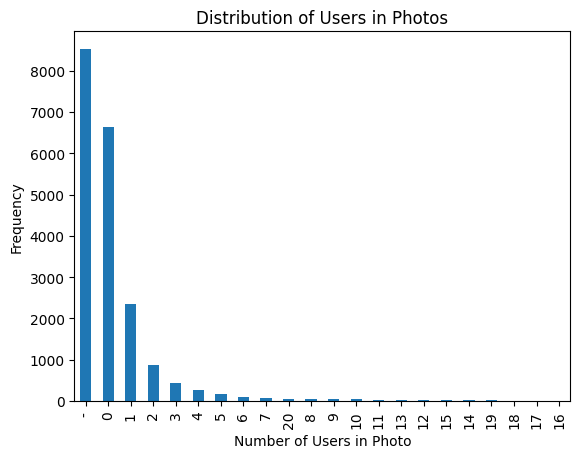

In [5]:
# Plottting a barchart of the num_users_in_photo column value counts
import matplotlib.pyplot as plt

instagram_data['num_users_in_photo'].value_counts().plot(kind='bar')
plt.xlabel('Number of Users in Photo')
plt.ylabel('Frequency')
plt.title('Distribution of Users in Photos')
plt.show()


In [6]:
# Converting all '-' to null in num_users_in_photo
instagram_data['num_users_in_photo'] = instagram_data['num_users_in_photo'].replace('-', None)
# Converting num_users_in_photo to int64 type
instagram_data['num_users_in_photo'] = instagram_data['num_users_in_photo'].astype('Int64')
# Checking the data types again
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19681 entries, 0 to 19680
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            19681 non-null  object        
 1   num_followers       19681 non-null  int64         
 2   num_following       19681 non-null  int64         
 3   num_likes           19681 non-null  int64         
 4   num_comments        19681 non-null  int64         
 5   post_caption        19675 non-null  object        
 6   date_of_post        19681 non-null  datetime64[ns]
 7   post_type           19681 non-null  int64         
 8   num_users_in_photo  11154 non-null  Int64         
 9   link_to_post        19681 non-null  object        
 10  list_of_tags        13862 non-null  object        
 11  num_hashtags        19681 non-null  int64         
 12  list_of_mentions    6746 non-null   object        
 13  num_mentions        19681 non-null  int64     

In [7]:
# Examining the mean, median, minimum, max, and range of numeric columns
instagram_data.describe()

num_followers  num_following      num_likes  num_comments  \
count   1.968100e+04   19681.000000   19681.000000  19681.000000   
mean    6.256413e+04    1489.766831    2497.766983     39.825111   
min     1.799300e+04       0.000000       0.000000      0.000000   
25%     2.329900e+04     174.000000     420.000000      1.000000   
50%     3.669900e+04     506.000000    1073.000000      5.000000   
75%     6.279100e+04    1367.000000    2683.000000     17.000000   
max     1.134619e+06    7586.000000  158338.000000  26011.000000   
std     1.042349e+05    2252.675356    5574.988136    447.972795   

                        date_of_post     post_type  num_users_in_photo  \
count                          19681  19681.000000             11154.0   
mean   2017-04-21 05:07:52.777196288      1.095981            1.072261   
min              2016-03-27 08:21:35      1.000000                 0.0   
25%              2017-04-17 21:08:39      1.000000                 0.0   
50%              2017-04-22 15:32:28      1.000000                 0.0   
75%              2017-04-27 13:03:24      1.000000                 1.0   
max              2017-05-02 17:07:30      2.000000                20.0   
std                              NaN      0.294573            2.399112   

       num_hashtags  num_mentions  
count  19681.000000  19681.000000  
mean       6.737005      0.723591  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        3.000000      0.000000  
75%       10.000000      1.000000  
max       41.000000     34.000000  
std        8.782144      1.704316

In [8]:
# The following columns have missing values
'''
post_caption        19675 non-null  object
num_users_in_photo  11154 non-null  Int64
list_of_tags        13862 non-null  object
list_of_mentions    6746 non-null   object
'''

# Calculate the num_users_in_photo mean and replace null values with mean
mean_users = instagram_data['num_users_in_photo'].mean()
mean_users = mean_users.round()  # necessary step to make the types agree when filling values

# Fill all null values with a phrase indicating no value
instagram_data.fillna({'num_users_in_photo' : mean_users}, inplace=True)
instagram_data.fillna({'post_caption': '',
                         'list_of_tags': '',
                         'list_of_mentions': ''}, inplace=True)

In [9]:
# Check for duplicates based on all columns
duplicates = instagram_data[instagram_data.duplicated()]
print("Complete Duplicate Rows:")
duplicates.head()

# Check for duplicates based on link_to_post to see if multiple point to the same one
duplicates_specific = instagram_data[instagram_data.duplicated(subset=['link_to_post'])]
print("\nDuplicate Rows based on link_to_post:")
duplicates_specific.head()

Complete Duplicate Rows:

Duplicate Rows based on link_to_post:


Empty DataFrame
Columns: [username, num_followers, num_following, num_likes, num_comments, post_caption, date_of_post, post_type, num_users_in_photo, link_to_post, list_of_tags, num_hashtags, list_of_mentions, num_mentions]
Index: []

In [10]:
# Double check that post_type was categorized correctly with only 1s and 2s
instagram_data['post_type'].unique()

array([1, 2])

In [11]:
# Numerical columns to detect outliers for:
'''
num_followers       19681 non-null  int64
num_following       19681 non-null  int64
num_likes           19681 non-null  int64
num_comments        19681 non-null  int64
num_users_in_photo  11154 non-null  Int64
num_hashtags     19681 non-null  int64
num_mentions  19681 non-null  int64
'''
from scipy.stats import zscore
# Creating a separate table for z_scores to keep our dataset clean
z_scores = pd.DataFrame()

In [12]:
# Calculating the z scores for all numerical columns and adding to table for viewing later
z_scores["z-num_followers"] = zscore(instagram_data["num_followers"])
z_scores["z-num_following"] = zscore(instagram_data["num_following"])
z_scores["z-num_likes"] = zscore(instagram_data["num_likes"])
z_scores["z-num_comments"] = zscore(instagram_data["num_comments"])
z_scores["z-num_users_in_photo"] = zscore(instagram_data["num_users_in_photo"])
z_scores["z-num_hashtags"] = zscore(instagram_data["num_hashtags"])
z_scores["z-num_mentions"] = zscore(instagram_data["num_mentions"])

In [13]:
# Using describe to examine the max and min of each calculated z-score...
z_scores.describe()

z-num_followers  z-num_following   z-num_likes  z-num_comments  \
count     1.968100e+04     1.968100e+04  1.968100e+04    1.968100e+04   
mean     -3.465886e-17     4.621181e-17  3.465886e-17    1.444119e-17   
std       1.000025e+00     1.000025e+00  1.000025e+00    1.000025e+00   
min      -4.276137e-01    -6.613490e-01 -4.480423e-01   -8.890299e-02   
25%      -3.767082e-01    -5.841056e-01 -3.727039e-01   -8.667066e-02   
50%      -2.481491e-01    -4.367215e-01 -2.555706e-01   -7.774132e-02   
75%       2.176628e-03    -5.449962e-02  3.322657e-02   -5.095330e-02   
max       1.028526e+01     2.706288e+00  2.795417e+01    5.797637e+01   

       z-num_users_in_photo  z-num_hashtags  z-num_mentions  
count               19681.0    1.968100e+04    1.968100e+04  
mean                    0.0    9.242363e-17   -2.021767e-17  
std                1.000025    1.000025e+00    1.000025e+00  
min               -0.576266   -7.671448e-01   -4.245749e-01  
25%               -0.576266   -7.671448e-01   -4.245749e-01  
50%               -0.022671   -4.255339e-01   -4.245749e-01  
75%               -0.022671    3.715582e-01    1.621858e-01  
max               10.495626    3.901538e+00    1.952529e+01

In [14]:
# Given our threshold of three, creating and printing a list of all columns that have outliers
threshold = 3
outlier_columns = []
for col in z_scores.columns:
    if (z_scores[col].abs() > threshold).any():
        outlier_columns.append(col)

print("Columns with outliers z-score > 3:", outlier_columns)

Columns with outliers z-score > 3: ['z-num_followers', 'z-num_likes', 'z-num_comments', 'z-num_users_in_photo', 'z-num_hashtags', 'z-num_mentions']


In [15]:
# Re-calculating to take a closer look at the range of outliers in each column
outlier_values = {}

for col in z_scores.columns:
    if (z_scores[col].abs() > threshold).any():
        outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
        outlier_values[col] = instagram_data.loc[outlier_indices, col.replace("z-", "")]

for col, values in outlier_values.items():
    column = col.replace('z-', '')
    print(f"\nOutlier values range for {column}: ({values.min()}, {values.max()})")
    print(f"\tMean value of {column}: {instagram_data[column].mean()}")
    print(f"\tNumber of outliers in {column}: {len(values)}")


Outlier values range for num_followers: (406776, 1134619)
	Mean value of num_followers: 62564.12524770083
	Number of outliers in num_followers: 337

Outlier values range for num_likes: (19235, 158338)
	Mean value of num_likes: 2497.7669833849905
	Number of outliers in num_likes: 239

Outlier values range for num_comments: (1402, 26011)
	Mean value of num_comments: 39.8251105126772
	Number of outliers in num_comments: 70

Outlier values range for num_users_in_photo: (7, 20)
	Mean value of num_users_in_photo: 1.040953203597378
	Number of outliers in num_users_in_photo: 356

Outlier values range for num_hashtags: (34, 41)
	Mean value of num_hashtags: 6.737005233473909
	Number of outliers in num_hashtags: 15

Outlier values range for num_mentions: (6, 34)
	Mean value of num_mentions: 0.723591280930847
	Number of outliers in num_mentions: 382


In [16]:
# Drop rows based on outlier criteria from the z_scores table
print(f"Dataset shape before removing outliers: {instagram_data.shape}")

for col in outlier_columns:
    column_name = col.replace("z-", "")  # need to put to get the original column name
    outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
    instagram_data.drop(outlier_indices, inplace=True)

instagram_data = instagram_data.reset_index(drop=True)
print(f"Dataset shape after removing outliers: {instagram_data.shape}")

Dataset shape before removing outliers: (19681, 14)
Dataset shape after removing outliers: (18505, 14)


<ipython-input-16-3f97d611f10d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
<ipython-input-16-3f97d611f10d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
<ipython-input-16-3f97d611f10d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
<ipython-input-16-3f97d611f10d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices = instagram_data[z_scores[col].abs() > threshold].index
<ipython-input-16-3f97d611f10d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_indices = instagram_data[z_scores[col].abs() > threshold].index


In [17]:
# List of variables to capture in the model
'''
(1) Number of followers                     -- num_followers
(2) Number of following                     -- num_following
(3) Month of posting                        -- NEED TO CREATE
(4) Day of posting (Monday, Tuesday, ...).  -- NEED TO CREATE
(5) Timing of the post                      -- NEED TO CREATE
    a. Morning (between 8AM and noon)
    b. Afternoon (noon – 4PM)
    c. Evening (4PM-8PM)
    d. Night (8PM to midnight)
(6) Number of hashtags used in the post    -- num_hashtags
(7) Number of people tagged in the post    -- num_mentions
(8) Type of post (video or photo)          -- post_type (NEED TO DUMMY CODE)
(9) Number of users in the post            -- num_users_in_photo
(10) Length of the post’s text             -- NEED TO CREATE
'''

# Capture the month of posting using the month info from date_of_post
instagram_data['month_of_post'] = pd.to_datetime(instagram_data['date_of_post']).dt.month

# Capture the day of posting using the day name info from date_of_post
instagram_data['day_of_post'] = pd.to_datetime(instagram_data['date_of_post']).dt.day_name()

# Capture the timing of post using time info from date_of_post
instagram_data['timing_of_post'] = ''
for index, row in instagram_data.iterrows():
    time = pd.to_datetime(row['date_of_post']).time()
    if time >= pd.to_datetime('08:00:00').time() and time < pd.to_datetime('12:00:00').time():
        instagram_data.at[index, 'timing_of_post'] = 'is_morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('16:00:00').time():
        instagram_data.at[index, 'timing_of_post'] = 'is_afternoon'
    elif time >= pd.to_datetime('16:00:00').time() and time < pd.to_datetime('20:00:00').time():
        instagram_data.at[index, 'timing_of_post'] = 'is_evening'
    else:
        instagram_data.at[index, 'timing_of_post'] = 'is_night'

# Dummy coding post_type and dropping the dummy
instagram_data['post_type'] = instagram_data['post_type'].map({
    1: 'post_is_photo',  # this part is just for readability
    2: 'post_is_video'   # we could've gone without this mapping step
})
dummy_post_type = pd.get_dummies(instagram_data['post_type'], dtype=int, drop_first=True)
instagram_data = instagram_data.drop('post_type', axis=1)  # dropping the original
instagram_data = pd.concat([instagram_data, dummy_post_type], axis=1)

# Capture the length of the post's text
instagram_data['length_of_post'] = instagram_data['post_caption'].str.len()

# Viewing dataset to check everything was created propoerly
instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  marakiiliaki         365995           1160      13198            24   
1  marakiiliaki         365995           1160       9944            21   
2  marakiiliaki         365995           1160       6507            23   
3  marakiiliaki         365995           1160       9980            24   
4  marakiiliaki         365995           1160      12934            39   

                                        post_caption        date_of_post  \
0           Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
1                              Αιγαίο...#happyeaster 2017-04-15 14:38:22   
2                            Μόνο εσύ @aremovic .... 2017-04-17 02:11:06   
3                     Δε σε φοβάμαι...#easter #tinos 2017-04-17 20:35:58   
4  Στο mariailiaki.gr λατρεύουμε τις φουστες?????... 2017-04-18 10:04:47   

   num_users_in_photo                              link_to_post  \
0                   0  https://www.instagram.com/p/BS3ldNxB_Sc/   
1                   0  https://www.instagram.com/p/BS55QZaBQK2/   
2                   0  https://www.instagram.com/p/BS9tVBkhQwB/   
3                   1  https://www.instagram.com/p/BS_rxSpBhvi/   
4                   0  https://www.instagram.com/p/BTBIVQSBsnJ/   

                 list_of_tags  num_hashtags           list_of_mentions  \
0                #happyeaster             1                              
1                #happyeaster             1                              
2                                         0                  @aremovic   
3              #easter #tinos             2                              
4  #mariailiakigr #instastyle             2  @ioannasalamoura @panosgi   

   num_mentions  month_of_post day_of_post timing_of_post  post_is_video  \
0             0              4      Friday     is_evening              0   
1             0              4    Saturday   is_afternoon              0   
2             1              4      Monday       is_night              1   
3             0              4      Monday       is_night              0   
4             2              4     Tuesday     is_morning              0   

   length_of_post  
0              40  
1              21  
2              23  
3              30  
4             111

In [18]:
instagram_data.describe()

num_followers  num_following     num_likes  num_comments  \
count   18505.000000   18505.000000  18505.000000  18505.000000   
mean    49789.718779    1489.398055   1933.700405     18.782329   
min     17993.000000       0.000000      0.000000      0.000000   
25%     23100.000000     159.000000    404.000000      1.000000   
50%     34942.000000     494.000000   1039.000000      5.000000   
75%     58001.000000    1367.000000   2479.000000     15.000000   
max    365995.000000    7586.000000  19175.000000   1368.000000   
std     42846.335351    2269.286634   2472.080714     60.317168   

                        date_of_post  num_users_in_photo  num_hashtags  \
count                          18505             18505.0  18505.000000   
mean   2017-04-22 04:45:24.142825984            0.839233      6.596001   
min              2016-03-27 08:21:35                 0.0      0.000000   
25%              2017-04-17 21:50:07                 0.0      0.000000   
50%              2017-04-22 16:13:21                 1.0      3.000000   
75%              2017-04-27 13:28:42                 1.0      9.000000   
max              2017-05-02 17:07:30                 6.0     33.000000   
std                              NaN             0.89411      8.687312   

       num_mentions  month_of_post  post_is_video  length_of_post  
count  18505.000000   18505.000000   18505.000000    18505.000000  
mean       0.532559       4.066252       0.096082      151.703864  
min        0.000000       1.000000       0.000000        0.000000  
25%        0.000000       4.000000       0.000000       38.000000  
50%        0.000000       4.000000       0.000000       98.000000  
75%        1.000000       4.000000       0.000000      212.000000  
max        5.000000      12.000000       1.000000     2191.000000  
std        0.947459       0.272573       0.294712      180.574815

In [19]:
# Examining data types post creating new variables
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            18505 non-null  object        
 1   num_followers       18505 non-null  int64         
 2   num_following       18505 non-null  int64         
 3   num_likes           18505 non-null  int64         
 4   num_comments        18505 non-null  int64         
 5   post_caption        18505 non-null  object        
 6   date_of_post        18505 non-null  datetime64[ns]
 7   num_users_in_photo  18505 non-null  Int64         
 8   link_to_post        18505 non-null  object        
 9   list_of_tags        18505 non-null  object        
 10  num_hashtags        18505 non-null  int64         
 11  list_of_mentions    18505 non-null  object        
 12  num_mentions        18505 non-null  int64         
 13  month_of_post       18505 non-null  int32     

In [20]:
# See how many of each category are in this dataset
print(instagram_data['month_of_post'].value_counts())   # Only has data from Dec - May
print(instagram_data['day_of_post'].value_counts())     # Has data from all 7 days
print(instagram_data['timing_of_post'].value_counts())  # Has data from all 4 timings

month_of_post
4     17235
5      1248
2        12
3         5
1         3
12        2
Name: count, dtype: int64
day_of_post
Sunday       2957
Thursday     2952
Friday       2855
Monday       2791
Saturday     2733
Tuesday      2192
Wednesday    2025
Name: count, dtype: int64
timing_of_post
is_night        6924
is_evening      4699
is_afternoon    4662
is_morning      2220
Name: count, dtype: int64


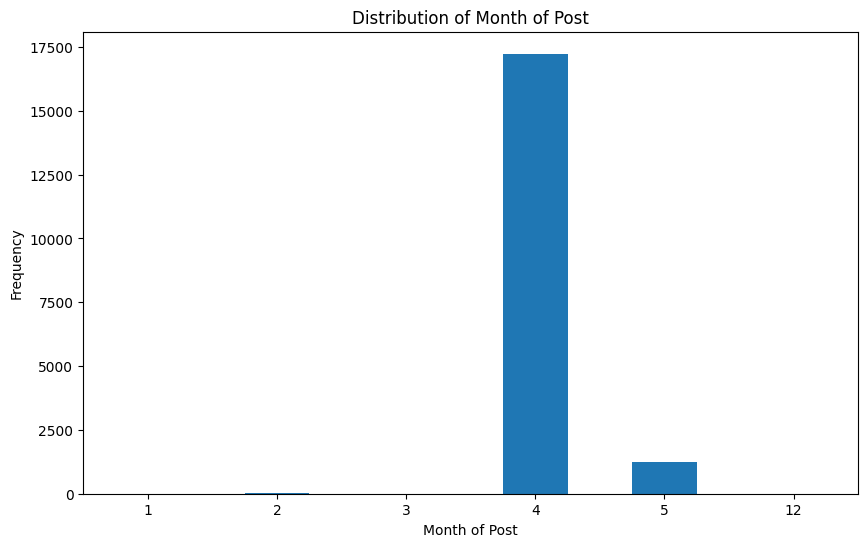

In [21]:
import matplotlib.pyplot as plt

# Plotting distribution of month_of_post for report
plt.figure(figsize=(10, 6))
instagram_data['month_of_post'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month of Post')
plt.ylabel('Frequency')
plt.title('Distribution of Month of Post')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Dummy coding month_of_post
instagram_data['month_of_post'] = instagram_data['month_of_post'].map({
    1: 'is_january',    # this part is just for readability
    2: 'is_february',   # we could've gone without this mapping step
    3: 'is_march',
    4: 'is_april',
    5: 'is_may',
    6: 'is_june',
    7: 'is_july',
    8: 'is_august',
    9: 'is_september',
    10: 'is_october',
    11: 'is_november',
    12: 'is_december'
})
dummy_post_type = pd.get_dummies(instagram_data['month_of_post'], dtype=int, drop_first=True)
instagram_data = instagram_data.drop('month_of_post', axis=1)  # dropping the original
instagram_data = pd.concat([instagram_data, dummy_post_type], axis=1)

# Dummy coding day_of_post
dummy_post_type = pd.get_dummies(instagram_data['day_of_post'], dtype=int, drop_first=True)
instagram_data = instagram_data.drop('day_of_post', axis=1)  # dropping the original
instagram_data = pd.concat([instagram_data, dummy_post_type], axis=1)

# Dummy coding timing_of_post
dummy_post_type = pd.get_dummies(instagram_data['timing_of_post'], dtype=int, drop_first=True)
instagram_data = instagram_data.drop('timing_of_post', axis=1)  # dropping the original
instagram_data = pd.concat([instagram_data, dummy_post_type], axis=1)

# Viewing dataset to check everything was created propoerly
instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  marakiiliaki         365995           1160      13198            24   
1  marakiiliaki         365995           1160       9944            21   
2  marakiiliaki         365995           1160       6507            23   
3  marakiiliaki         365995           1160       9980            24   
4  marakiiliaki         365995           1160      12934            39   

                                        post_caption        date_of_post  \
0           Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
1                              Αιγαίο...#happyeaster 2017-04-15 14:38:22   
2                            Μόνο εσύ @aremovic .... 2017-04-17 02:11:06   
3                     Δε σε φοβάμαι...#easter #tinos 2017-04-17 20:35:58   
4  Στο mariailiaki.gr λατρεύουμε τις φουστες?????... 2017-04-18 10:04:47   

   num_users_in_photo                              link_to_post  \
0                   0  https://www.instagram.com/p/BS3ldNxB_Sc/   
1                   0  https://www.instagram.com/p/BS55QZaBQK2/   
2                   0  https://www.instagram.com/p/BS9tVBkhQwB/   
3                   1  https://www.instagram.com/p/BS_rxSpBhvi/   
4                   0  https://www.instagram.com/p/BTBIVQSBsnJ/   

                 list_of_tags  ...  is_may Monday  Saturday  Sunday  Thursday  \
0                #happyeaster  ...       0      0         0       0         0   
1                #happyeaster  ...       0      0         1       0         0   
2                              ...       0      1         0       0         0   
3              #easter #tinos  ...       0      1         0       0         0   
4  #mariailiakigr #instastyle  ...       0      0         0       0         0   

   Tuesday  Wednesday  is_evening  is_morning  is_night  
0        0          0           1           0         0  
1        0          0           0           0         0  
2        0          0           0           0         1  
3        0          0           0           0         1  
4        1          0           0           1         0  

[5 rows x 29 columns]

In [23]:
# Combine the evening and night dummy columns into one column called evening or night
instagram_data['evening_or_night'] = instagram_data['is_evening'] | instagram_data['is_night']
instagram_data = instagram_data.drop(['is_evening', 'is_night'], axis=1)

In [24]:
# Combine all non-April month dummy columns into one column called non_april_month
non_april_months = ['is_december', 'is_january', 'is_february', 'is_march', 'is_may']
instagram_data['non_april_month'] = instagram_data[non_april_months].any(axis=1).astype(int)
instagram_data = instagram_data.drop(columns=non_april_months)

instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  marakiiliaki         365995           1160      13198            24   
1  marakiiliaki         365995           1160       9944            21   
2  marakiiliaki         365995           1160       6507            23   
3  marakiiliaki         365995           1160       9980            24   
4  marakiiliaki         365995           1160      12934            39   

                                        post_caption        date_of_post  \
0           Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
1                              Αιγαίο...#happyeaster 2017-04-15 14:38:22   
2                            Μόνο εσύ @aremovic .... 2017-04-17 02:11:06   
3                     Δε σε φοβάμαι...#easter #tinos 2017-04-17 20:35:58   
4  Στο mariailiaki.gr λατρεύουμε τις φουστες?????... 2017-04-18 10:04:47   

   num_users_in_photo                              link_to_post  \
0                   0  https://www.instagram.com/p/BS3ldNxB_Sc/   
1                   0  https://www.instagram.com/p/BS55QZaBQK2/   
2                   0  https://www.instagram.com/p/BS9tVBkhQwB/   
3                   1  https://www.instagram.com/p/BS_rxSpBhvi/   
4                   0  https://www.instagram.com/p/BTBIVQSBsnJ/   

                 list_of_tags  ...  length_of_post Monday  Saturday  Sunday  \
0                #happyeaster  ...              40      0         0       0   
1                #happyeaster  ...              21      0         1       0   
2                              ...              23      1         0       0   
3              #easter #tinos  ...              30      1         0       0   
4  #mariailiakigr #instastyle  ...             111      0         0       0   

   Thursday  Tuesday  Wednesday  is_morning  evening_or_night  non_april_month  
0         0        0          0           0                 1                0  
1         0        0          0           0                 0                0  
2         0        0          0           0                 1                0  
3         0        0          0           0                 1                0  
4         0        1          0           1                 0                0  

[5 rows x 24 columns]

In [25]:
# Printing unique counts for purposes of writing the report
print(instagram_data['username'].nunique())
print(instagram_data['post_caption'].nunique())
print(instagram_data['link_to_post'].nunique())
print(instagram_data['list_of_tags'].nunique())
print(instagram_data['list_of_mentions'].nunique())
instagram_data['post_is_video'].value_counts()


1071
16290
18505
8976
3827


post_is_video
0    16727
1     1778
Name: count, dtype: int64

In [26]:
# Ensuring all types are correct and double check which columns were dropped
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            18505 non-null  object        
 1   num_followers       18505 non-null  int64         
 2   num_following       18505 non-null  int64         
 3   num_likes           18505 non-null  int64         
 4   num_comments        18505 non-null  int64         
 5   post_caption        18505 non-null  object        
 6   date_of_post        18505 non-null  datetime64[ns]
 7   num_users_in_photo  18505 non-null  Int64         
 8   link_to_post        18505 non-null  object        
 9   list_of_tags        18505 non-null  object        
 10  num_hashtags        18505 non-null  int64         
 11  list_of_mentions    18505 non-null  object        
 12  num_mentions        18505 non-null  int64         
 13  post_is_video       18505 non-null  int64     

In [27]:
# This is our final, cleaned dataset!!! (pre-standardization/scaling)
instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  marakiiliaki         365995           1160      13198            24   
1  marakiiliaki         365995           1160       9944            21   
2  marakiiliaki         365995           1160       6507            23   
3  marakiiliaki         365995           1160       9980            24   
4  marakiiliaki         365995           1160      12934            39   

                                        post_caption        date_of_post  \
0           Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
1                              Αιγαίο...#happyeaster 2017-04-15 14:38:22   
2                            Μόνο εσύ @aremovic .... 2017-04-17 02:11:06   
3                     Δε σε φοβάμαι...#easter #tinos 2017-04-17 20:35:58   
4  Στο mariailiaki.gr λατρεύουμε τις φουστες?????... 2017-04-18 10:04:47   

   num_users_in_photo                              link_to_post  \
0                   0  https://www.instagram.com/p/BS3ldNxB_Sc/   
1                   0  https://www.instagram.com/p/BS55QZaBQK2/   
2                   0  https://www.instagram.com/p/BS9tVBkhQwB/   
3                   1  https://www.instagram.com/p/BS_rxSpBhvi/   
4                   0  https://www.instagram.com/p/BTBIVQSBsnJ/   

                 list_of_tags  ...  length_of_post Monday  Saturday  Sunday  \
0                #happyeaster  ...              40      0         0       0   
1                #happyeaster  ...              21      0         1       0   
2                              ...              23      1         0       0   
3              #easter #tinos  ...              30      1         0       0   
4  #mariailiakigr #instastyle  ...             111      0         0       0   

   Thursday  Tuesday  Wednesday  is_morning  evening_or_night  non_april_month  
0         0        0          0           0                 1                0  
1         0        0          0           0                 0                0  
2         0        0          0           0                 1                0  
3         0        0          0           0                 1                0  
4         0        1          0           1                 0                0  

[5 rows x 24 columns]

# **Preparing for Question 1**

In [28]:
# Make a copy of instagram_data just in case
instagram_data_copy_q1 = instagram_data.copy()

# Dropping columns unnecessary for linear regression analysis
columns_to_keep_q1 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'post_is_video',
                   'length_of_post', 'non_april_month', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday',
                   'is_morning', 'evening_or_night', 'num_likes', 'num_comments']

insta_data_q1 = instagram_data_copy_q1[columns_to_keep_q1]
insta_data_q1.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0         365995           1160                   0             1   
1         365995           1160                   0             1   
2         365995           1160                   0             0   
3         365995           1160                   1             2   
4         365995           1160                   0             2   

   num_mentions  post_is_video  length_of_post  non_april_month  Monday  \
0             0              0              40                0       0   
1             0              0              21                0       0   
2             1              1              23                0       1   
3             0              0              30                0       1   
4             2              0             111                0       0   

   Tuesday  Wednesday  Thursday  Saturday  Sunday  is_morning  \
0        0          0         0         0       0           0   
1        0          0         0         1       0           0   
2        0          0         0         0       0           0   
3        0          0         0         0       0           0   
4        1          0         0         0       0           1   

   evening_or_night  num_likes  num_comments  
0                 1      13198            24  
1                 0       9944            21  
2                 1       6507            23  
3                 1       9980            24  
4                 0      12934            39

In [29]:
# Standardizing all the continuous numeric columns (not including dummy coded)
columns_to_standardize_q1 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'length_of_post']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
instagram_data_scaled_q1 = insta_data_q1.copy()  # created a copy to not modify original
instagram_data_scaled_q1[columns_to_standardize_q1] = scaler.fit_transform(instagram_data[columns_to_standardize_q1])

# Double check it worked where mean is close to 0 and std is close to 1
print(instagram_data_scaled_q1[columns_to_standardize_q1].describe())

       num_followers  num_following  num_users_in_photo  num_hashtags  \
count   1.850500e+04   1.850500e+04        1.850500e+04  1.850500e+04   
mean    6.143574e-17   3.071787e-18       -2.457430e-17 -3.071787e-17   
std     1.000027e+00   1.000027e+00        1.000027e+00  1.000027e+00   
min    -7.421306e-01  -6.563465e-01       -9.386484e-01 -7.592888e-01   
25%    -6.229340e-01  -5.862785e-01       -9.386484e-01 -7.592888e-01   
50%    -3.465435e-01  -4.386510e-01        1.798119e-01 -4.139483e-01   
75%     1.916501e-01  -5.393826e-02        1.798119e-01  2.767328e-01   
max     7.380184e+00   2.686645e+00        5.772113e+00  3.039457e+00   

       num_mentions  length_of_post  
count  1.850500e+04    1.850500e+04  
mean  -3.686144e-17    5.759601e-17  
std    1.000027e+00    1.000027e+00  
min   -5.621070e-01   -8.401391e-01  
25%   -5.621070e-01   -6.296943e-01  
50%   -5.621070e-01   -2.974131e-01  
75%    4.933765e-01    3.339212e-01  
max    4.715311e+00    1.129366e+01  


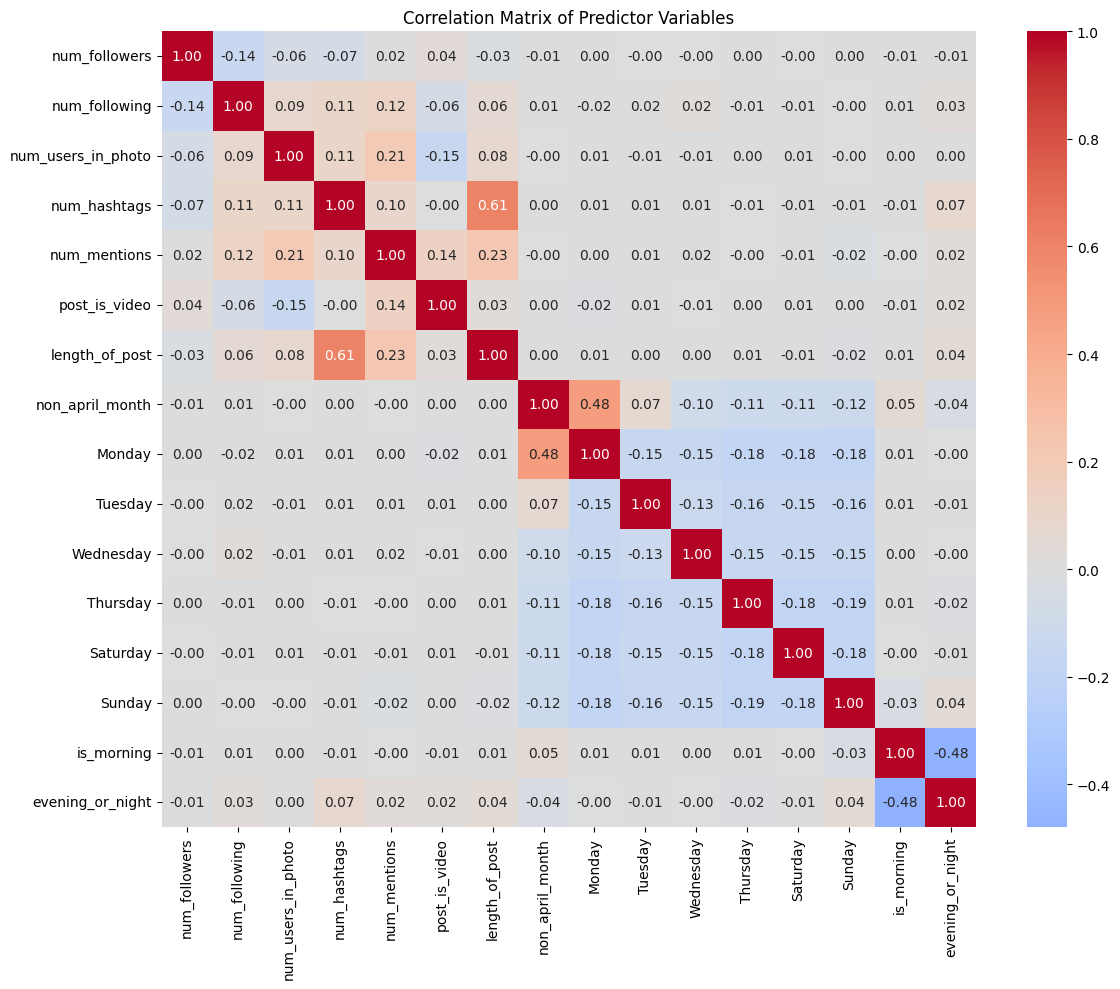

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Testing for multicollinearity
independent_variables_scaled_q1 = instagram_data_scaled_q1.drop(['num_likes', 'num_comments'], axis=1) # drop dependent variables
correlation_matrix_q1 = independent_variables_scaled_q1.corr()

# Visualizing corr. matrix as a heatmap for easier interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_q1,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables')
plt.tight_layout()
plt.show()

In [31]:
# Calculate VIF to also test for multicolinearity
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_variables_scaled_q1.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_variables_scaled_q1.values, i)
                       for i in range(independent_variables_scaled_q1.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(independent_variables_scaled_q1)

print("\nVariance Inflation Factors:")
print(vif_results)


Variance Inflation Factors:
              Variable       VIF
15    evening_or_night  2.477609
8               Monday  1.724491
6       length_of_post  1.654123
3         num_hashtags  1.617049
7      non_april_month  1.446555
13              Sunday  1.360660
11            Thursday  1.320445
12            Saturday  1.304755
9              Tuesday  1.281750
14          is_morning  1.281040
10           Wednesday  1.227109
5        post_is_video  1.163387
4         num_mentions  1.153348
2   num_users_in_photo  1.097970
1        num_following  1.054779
0        num_followers  1.029177


In [32]:
# Our dataset is ready for linear regression in question 1!
instagram_data_scaled_q1.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0       7.380184      -0.145159           -0.938648     -0.644175   
1       7.380184      -0.145159           -0.938648     -0.644175   
2       7.380184      -0.145159           -0.938648     -0.759289   
3       7.380184      -0.145159            0.179812     -0.529062   
4       7.380184      -0.145159           -0.938648     -0.529062   

   num_mentions  post_is_video  length_of_post  non_april_month  Monday  \
0     -0.562107              0       -0.618618                0       0   
1     -0.562107              0       -0.723841                0       0   
2      0.493377              1       -0.712765                0       1   
3     -0.562107              0       -0.673998                0       1   
4      1.548860              0       -0.225419                0       0   

   Tuesday  Wednesday  Thursday  Saturday  Sunday  is_morning  \
0        0          0         0         0       0           0   
1        0          0         0         1       0           0   
2        0          0         0         0       0           0   
3        0          0         0         0       0           0   
4        1          0         0         0       0           1   

   evening_or_night  num_likes  num_comments  
0                 1      13198            24  
1                 0       9944            21  
2                 1       6507            23  
3                 1       9980            24  
4                 0      12934            39

In [33]:
# Double checking everything looks alright
instagram_data_scaled_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_followers       18505 non-null  float64
 1   num_following       18505 non-null  float64
 2   num_users_in_photo  18505 non-null  float64
 3   num_hashtags        18505 non-null  float64
 4   num_mentions        18505 non-null  float64
 5   post_is_video       18505 non-null  int64  
 6   length_of_post      18505 non-null  float64
 7   non_april_month     18505 non-null  int64  
 8   Monday              18505 non-null  int64  
 9   Tuesday             18505 non-null  int64  
 10  Wednesday           18505 non-null  int64  
 11  Thursday            18505 non-null  int64  
 12  Saturday            18505 non-null  int64  
 13  Sunday              18505 non-null  int64  
 14  is_morning          18505 non-null  int64  
 15  evening_or_night    18505 non-null  int64  
 16  num_

# **Question 1 Linear Regression**

In [34]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define independent variables for both models
IVs = instagram_data_scaled_q1[['num_followers', 'num_following', 'num_users_in_photo',
                               'num_hashtags', 'num_mentions', 'post_is_video',
                               'length_of_post', 'non_april_month', 'Monday', 'Tuesday',
                               'Wednesday', 'Thursday', 'Saturday', 'Sunday',
                               'is_morning', 'evening_or_night']]

# Model 1: Predicting Likes
DV_likes = instagram_data_scaled_q1['num_likes']

# Add constant and fit likes model
IVs_with_const = sm.add_constant(IVs)
likes_model = sm.OLS(DV_likes, IVs_with_const).fit()

# Calculate RMSE for likes model
likes_predictions = likes_model.predict(IVs_with_const)
likes_rmse = np.sqrt(mean_squared_error(DV_likes, likes_predictions))

# Model 2: Predicting Comments
DV_comments = instagram_data_scaled_q1['num_comments']

# Fit comments model (using same IVs_with_const)
comments_model = sm.OLS(DV_comments, IVs_with_const).fit()

# Calculate RMSE for comments model
comments_predictions = comments_model.predict(IVs_with_const)
comments_rmse = np.sqrt(mean_squared_error(DV_comments, comments_predictions))

In [35]:
# Print results
print("=== Model 1: Predicting Number of Likes ===")
print("\nModel Summary:")
print(likes_model.summary())
print(f"\nRoot Mean Squared Error for Likes Model: {likes_rmse:.2f}")

print("\n=== Model 2: Predicting Number of Comments ===")
print("\nModel Summary:")
print(comments_model.summary())
print(f"\nRoot Mean Squared Error for Comments Model: {comments_rmse:.2f}")

=== Model 1: Predicting Number of Likes ===

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              num_likes   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     744.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:29:14   Log-Likelihood:            -1.6623e+05
No. Observations:               18505   AIC:                         3.325e+05
Df Residuals:                   18488   BIC:                         3.326e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

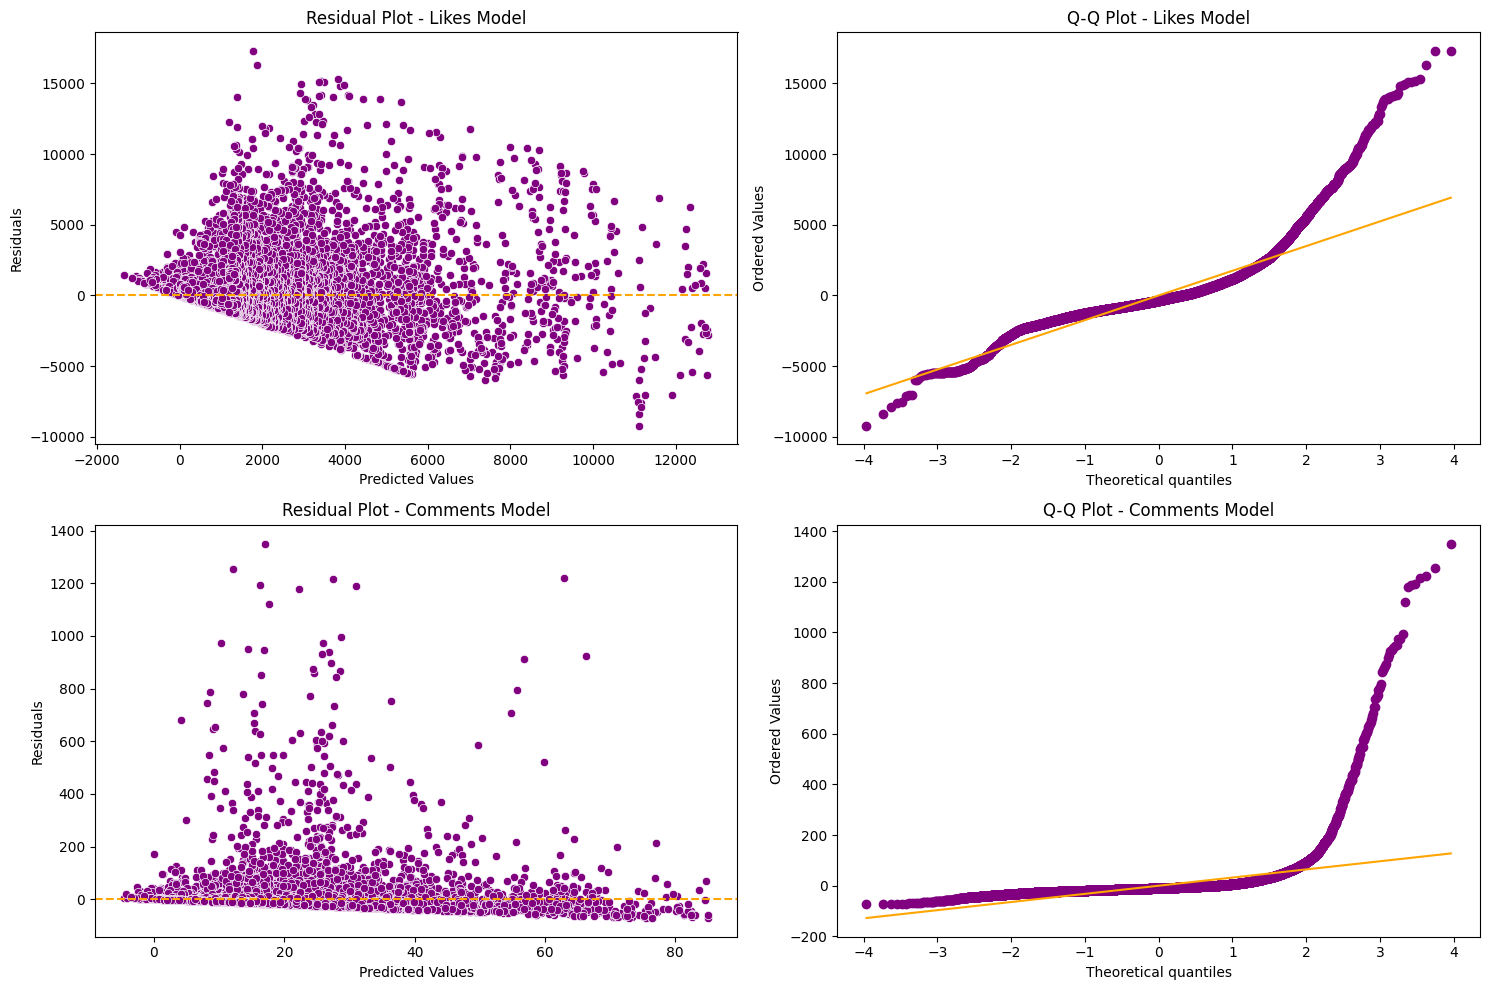

In [36]:
# Visualize residuals for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Likes model residual plot
sns.scatterplot(x=likes_predictions, y=likes_model.resid, color='purple', ax=axes[0,0])
axes[0,0].axhline(y=0, color='orange', linestyle='--')
axes[0,0].set_title('Residual Plot - Likes Model')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Likes model Q-Q plot
stats.probplot(likes_model.resid, dist="norm", plot=axes[0,1])
axes[0,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[0,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[0,1].get_lines()[1].set_color('orange')
axes[0,1].set_title('Q-Q Plot - Likes Model')

# Comments model residual plot
sns.scatterplot(x=comments_predictions, y=comments_model.resid, color='purple', ax=axes[1,0])
axes[1,0].axhline(y=0, color='orange', linestyle='--')
axes[1,0].set_title('Residual Plot - Comments Model')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')

# Comments model Q-Q plot
stats.probplot(comments_model.resid, dist="norm", plot=axes[1,1])
axes[1,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[1,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[1,1].get_lines()[1].set_color('orange')
axes[1,1].set_title('Q-Q Plot - Comments Model')

plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np

def analyze_coefficients(model, feature_names, X, y):
    # Calculate standard deviations
    X_std = X.std()
    y_std = y.std()

    # Calculate standardized betas
    standardized_betas = model.params[1:] * (X_std / y_std)

    # Create DataFrame with coefficient information
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.params[1:],
        'Standardized_Beta': standardized_betas,
        'P_Value': model.pvalues[1:],
        'Significant': model.pvalues[1:] < 0.05
    })

    # Sort by absolute standardized beta value
    coef_df['Abs_Standardized_Beta'] = abs(coef_df['Standardized_Beta'])
    coef_df = coef_df.sort_values('Abs_Standardized_Beta', ascending=False)

    return coef_df

In [38]:
# Get feature names (excluding constant)
feature_names = IVs.columns

# Analyze likes model
likes_importance = analyze_coefficients(likes_model, feature_names, IVs, DV_likes)
print("\n=== Variable Importance for Likes Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(likes_importance)

# Analyze comments model
comments_importance = analyze_coefficients(comments_model, feature_names, IVs, DV_comments)
print("\n=== Variable Importance for Comments Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(comments_importance)


=== Variable Importance for Likes Model ===

Ranked by standardized coefficient magnitude (higher = more important):
                               Feature  Coefficient  Standardized_Beta  \
num_followers            num_followers  1424.050508           0.576069   
num_following            num_following  -369.516209          -0.149480   
post_is_video            post_is_video  -708.128859          -0.084420   
non_april_month        non_april_month  -366.670290          -0.037501   
is_morning                  is_morning  -226.411214          -0.029760   
length_of_post          length_of_post   -72.008644          -0.029130   
num_hashtags              num_hashtags   -50.966805          -0.020618   
Monday                          Monday   131.183485           0.018992   
Wednesday                    Wednesday   140.813200           0.017783   
num_users_in_photo  num_users_in_photo   -34.521180          -0.013965   
evening_or_night      evening_or_night    68.479639           0.0133

In [39]:
# Analyze temporal effects
print("\n=== Temporal Effects Analysis ===")

# Day of week effects
day_vars_likes = likes_importance[likes_importance['Feature'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])]
best_day_likes = day_vars_likes.loc[day_vars_likes['Coefficient'].idxmax()]
print(f"\nBest day for likes: {best_day_likes['Feature']} (coefficient: {best_day_likes['Coefficient']:.3f})")

day_vars_comments = comments_importance[comments_importance['Feature'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])]
best_day_comments = day_vars_comments.loc[day_vars_comments['Coefficient'].idxmax()]
print(f"Best day for comments: {best_day_comments['Feature']} (coefficient: {best_day_comments['Coefficient']:.3f})")

# Time of day effects
time_vars_likes = likes_importance[likes_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on likes:")
print(time_vars_likes[['Feature', 'Coefficient', 'Significant']])

time_vars_comments = comments_importance[comments_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on comments:")
print(time_vars_comments[['Feature', 'Coefficient', 'Significant']])

# Month effects
month_effect_likes = likes_importance[likes_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on likes:")
print(month_effect_likes[['Feature', 'Coefficient', 'Significant']])

month_effect_comments = comments_importance[comments_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on comments:")
print(month_effect_comments[['Feature', 'Coefficient', 'Significant']])


=== Temporal Effects Analysis ===

Best day for likes: Wednesday (coefficient: 140.813)
Best day for comments: Tuesday (coefficient: 1.836)

Time of day effects on likes:
                           Feature  Coefficient  Significant
is_morning              is_morning  -226.411214         True
evening_or_night  evening_or_night    68.479639         True

Time of day effects on comments:
                           Feature  Coefficient  Significant
is_morning              is_morning    -2.315567        False
evening_or_night  evening_or_night     0.976187        False

Non-April vs April effect on likes:
                         Feature  Coefficient  Significant
non_april_month  non_april_month   -366.67029         True

Non-April vs April effect on comments:
                         Feature  Coefficient  Significant
non_april_month  non_april_month    -4.549451         True


# **Preparing for Question 2**

In [40]:
# Reminding ourselves what variables we have to create from
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   username            18505 non-null  object        
 1   num_followers       18505 non-null  int64         
 2   num_following       18505 non-null  int64         
 3   num_likes           18505 non-null  int64         
 4   num_comments        18505 non-null  int64         
 5   post_caption        18505 non-null  object        
 6   date_of_post        18505 non-null  datetime64[ns]
 7   num_users_in_photo  18505 non-null  Int64         
 8   link_to_post        18505 non-null  object        
 9   list_of_tags        18505 non-null  object        
 10  num_hashtags        18505 non-null  int64         
 11  list_of_mentions    18505 non-null  object        
 12  num_mentions        18505 non-null  int64         
 13  post_is_video       18505 non-null  int64     

In [41]:
# New variable 1: Number of question marks in a post, perhaps asking for engagement in comments
instagram_data['count_of_question'] = instagram_data['post_caption'].str.count('\?')

# New variable 2: Number of exclamation points, perhaps more exclamation points means happier or enthusiastic tone of caption
instagram_data['count_of_exclamation'] = instagram_data['post_caption'].str.count('\!')

In [42]:
# New variable 3: popular_tag_count is a count of if they use one of the 25 most common tags (this one requires steps to calculate)
all_hashtags = []
for tags in instagram_data['list_of_tags']:
    if pd.isna(tags) or tags == '':
        continue
    tag_list = [tag.strip() for tag in str(tags).split() if tag.startswith('#')]  # splits string by spaces and #s
    all_hashtags.extend(tag_list)

# Checks if we got hashtags successfully...
print("Number of hashtags collected:", len(all_hashtags))
print("First few hashtags:", all_hashtags[:5])

Number of hashtags collected: 122059
First few hashtags: ['#happyeaster', '#happyeaster', '#easter', '#tinos', '#mariailiakigr']


In [43]:
from collections import Counter
hashtag_counts = Counter(all_hashtags)
top_25_hashtags = set([tag for tag, count in hashtag_counts.most_common(25)])

# Print to see the results
for tag, count in hashtag_counts.most_common(25):
    print(f"{tag}: {count} times")

#greece: 1346 times
#love: 1000 times
#fashion: 907 times
#karasevda: 810 times
#greek: 665 times
#photooftheday: 591 times
#style: 580 times
#beautiful: 555 times
#instagood: 458 times
#greekquote: 440 times
#anime: 422 times
#summer: 415 times
#burakozcivit: 393 times
#greekquotes: 391 times
#athens: 383 times
#happy: 366 times
#follow: 345 times
#picoftheday: 342 times
#skg: 337 times
#cute: 328 times
#greekpost: 323 times
#girl: 322 times
#spring: 321 times
#thessaloniki: 320 times
#ootd: 318 times


In [44]:
# Creating the count for each post
popular_tag_count = []

for tags in instagram_data['list_of_tags']:
    if pd.isna(tags) or tags == '':
        popular_tag_count.append(0)
        continue
    post_tags = [tag for tag in str(tags).split() if tag.startswith('#')]  # splitting them up
    count = sum(1 for tag in post_tags if tag in top_25_hashtags)  # seeing how may were a part of the most popular
    popular_tag_count.append(count)

# Adding to instagram_data
instagram_data['popular_tag_count'] = popular_tag_count

# Checks the results to see distribution
print("Distribution of popular_tag_count:")
print(instagram_data['popular_tag_count'].value_counts().sort_index())
print("\nBasic statistics:")
print(instagram_data['popular_tag_count'].describe())

Distribution of popular_tag_count:
popular_tag_count
0     13692
1      1950
2      1072
3       729
4       215
5       294
6       243
7       105
8       116
9        14
10       16
11       49
12        9
13        1
Name: count, dtype: int64

Basic statistics:
count    18505.000000
mean         0.685112
std          1.582645
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: popular_tag_count, dtype: float64


In [45]:
# Make a copy of instagram_data just in case
instagram_data_copy_q2 = instagram_data.copy()

# Dropping columns unnecessary for linear regression analysis
columns_to_keep_q2 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'post_is_video',
                      'length_of_post', 'non_april_month', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday',
                      'is_morning', 'evening_or_night', 'count_of_question', 'count_of_exclamation','popular_tag_count',
                      'num_likes', 'num_comments']

insta_data_q2 = instagram_data_copy_q2[columns_to_keep_q2]
insta_data_q2.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0         365995           1160                   0             1   
1         365995           1160                   0             1   
2         365995           1160                   0             0   
3         365995           1160                   1             2   
4         365995           1160                   0             2   

   num_mentions  post_is_video  length_of_post  non_april_month  Monday  \
0             0              0              40                0       0   
1             0              0              21                0       0   
2             1              1              23                0       1   
3             0              0              30                0       1   
4             2              0             111                0       0   

   Tuesday  ...  Thursday  Saturday  Sunday  is_morning  evening_or_night  \
0        0  ...         0         0       0           0                 1   
1        0  ...         0         1       0           0                 0   
2        0  ...         0         0       0           0                 1   
3        0  ...         0         0       0           0                 1   
4        1  ...         0         0       0           1                 0   

   count_of_question  count_of_exclamation  popular_tag_count  num_likes  \
0                  0                     0                  0      13198   
1                  0                     0                  0       9944   
2                  0                     0                  0       6507   
3                  0                     0                  0       9980   
4                  6                     0                  0      12934   

   num_comments  
0            24  
1            21  
2            23  
3            24  
4            39  

[5 rows x 21 columns]

In [46]:
# Standardizing all the continuous numeric columns (not including dummy coded)
columns_to_standardize_q2 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'length_of_post', 'count_of_question', 'count_of_exclamation', 'popular_tag_count']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
instagram_data_scaled_q2 = insta_data_q2.copy()  # created a copy to not modify original
instagram_data_scaled_q2[columns_to_standardize_q2] = scaler.fit_transform(instagram_data[columns_to_standardize_q2])

# Double check it worked where mean is close to 0 and std is close to 1
print(instagram_data_scaled_q2[columns_to_standardize_q2].describe())

       num_followers  num_following  num_users_in_photo  num_hashtags  \
count   1.850500e+04   1.850500e+04        1.850500e+04  1.850500e+04   
mean    6.143574e-17   3.071787e-18       -2.457430e-17 -3.071787e-17   
std     1.000027e+00   1.000027e+00        1.000027e+00  1.000027e+00   
min    -7.421306e-01  -6.563465e-01       -9.386484e-01 -7.592888e-01   
25%    -6.229340e-01  -5.862785e-01       -9.386484e-01 -7.592888e-01   
50%    -3.465435e-01  -4.386510e-01        1.798119e-01 -4.139483e-01   
75%     1.916501e-01  -5.393826e-02        1.798119e-01  2.767328e-01   
max     7.380184e+00   2.686645e+00        5.772113e+00  3.039457e+00   

       num_mentions  length_of_post  count_of_question  count_of_exclamation  \
count  1.850500e+04    1.850500e+04       1.850500e+04          1.850500e+04   
mean  -3.686144e-17    5.759601e-17       1.151920e-17          6.143574e-18   
std    1.000027e+00    1.000027e+00       1.000027e+00          1.000027e+00   
min   -5.621070e-01   

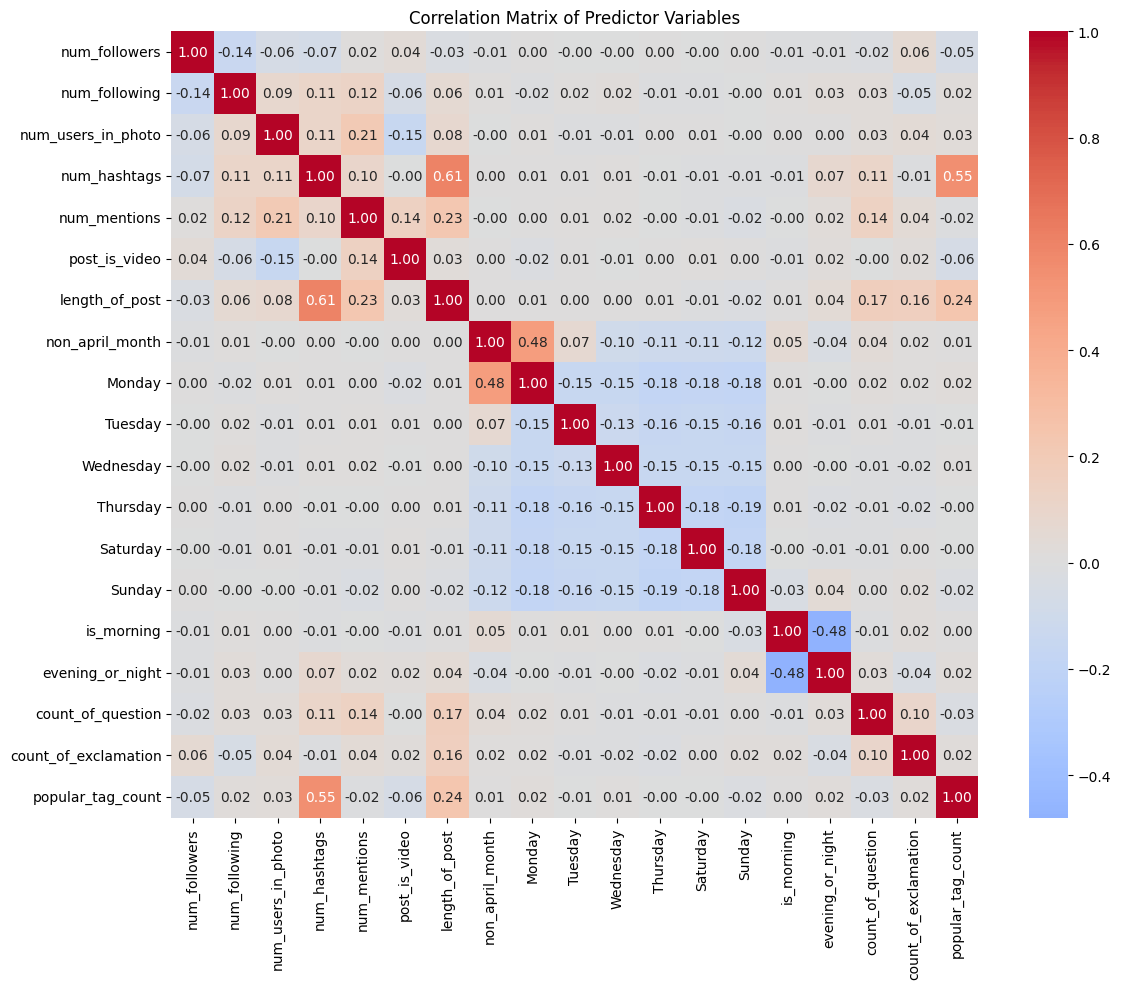

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Testing for multicollinearity
independent_variables_scaled_q2 = instagram_data_scaled_q2.drop(['num_likes', 'num_comments'], axis=1) # drop dependent variables
correlation_matrix_q2 = independent_variables_scaled_q2.corr()

# Visualizing corr. matrix as a heatmap for easier interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_q2,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables')
plt.tight_layout()
plt.show()

In [48]:
# Calculate VIF to also test for multicolinearity
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_variables_scaled_q2.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_variables_scaled_q2.values, i)
                       for i in range(independent_variables_scaled_q2.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(independent_variables_scaled_q2)

print("\nVariance Inflation Factors:")
print(vif_results)


Variance Inflation Factors:
                Variable       VIF
15      evening_or_night  2.481352
3           num_hashtags  2.292944
6         length_of_post  1.767255
8                 Monday  1.725745
18     popular_tag_count  1.506987
7        non_april_month  1.448525
13                Sunday  1.361882
11              Thursday  1.321035
12              Saturday  1.305378
9                Tuesday  1.281808
14            is_morning  1.281304
10             Wednesday  1.227829
5          post_is_video  1.169322
4           num_mentions  1.166968
2     num_users_in_photo  1.101697
17  count_of_exclamation  1.063738
16     count_of_question  1.059464
1          num_following  1.058883
0          num_followers  1.032946


In [49]:
# Our dataset is ready for linear regression in question 2!
instagram_data_scaled_q2.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0       7.380184      -0.145159           -0.938648     -0.644175   
1       7.380184      -0.145159           -0.938648     -0.644175   
2       7.380184      -0.145159           -0.938648     -0.759289   
3       7.380184      -0.145159            0.179812     -0.529062   
4       7.380184      -0.145159           -0.938648     -0.529062   

   num_mentions  post_is_video  length_of_post  non_april_month  Monday  \
0     -0.562107              0       -0.618618                0       0   
1     -0.562107              0       -0.723841                0       0   
2      0.493377              1       -0.712765                0       1   
3     -0.562107              0       -0.673998                0       1   
4      1.548860              0       -0.225419                0       0   

   Tuesday  ...  Thursday  Saturday  Sunday  is_morning  evening_or_night  \
0        0  ...         0         0       0           0                 1   
1        0  ...         0         1       0           0                 0   
2        0  ...         0         0       0           0                 1   
3        0  ...         0         0       0           0                 1   
4        1  ...         0         0       0           1                 0   

   count_of_question  count_of_exclamation  popular_tag_count  num_likes  \
0          -0.513394             -0.416138          -0.432902      13198   
1          -0.513394             -0.416138          -0.432902       9944   
2          -0.513394             -0.416138          -0.432902       6507   
3          -0.513394             -0.416138          -0.432902       9980   
4           1.295680             -0.416138          -0.432902      12934   

   num_comments  
0            24  
1            21  
2            23  
3            24  
4            39  

[5 rows x 21 columns]

In [50]:
# Double checking everything looks alright
instagram_data_scaled_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_followers         18505 non-null  float64
 1   num_following         18505 non-null  float64
 2   num_users_in_photo    18505 non-null  float64
 3   num_hashtags          18505 non-null  float64
 4   num_mentions          18505 non-null  float64
 5   post_is_video         18505 non-null  int64  
 6   length_of_post        18505 non-null  float64
 7   non_april_month       18505 non-null  int64  
 8   Monday                18505 non-null  int64  
 9   Tuesday               18505 non-null  int64  
 10  Wednesday             18505 non-null  int64  
 11  Thursday              18505 non-null  int64  
 12  Saturday              18505 non-null  int64  
 13  Sunday                18505 non-null  int64  
 14  is_morning            18505 non-null  int64  
 15  evening_or_night   

# **Question 2 Linear Regression with Created Variables**

In [51]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define independent variables for both models
IVs = instagram_data_scaled_q2[['num_followers', 'num_following', 'num_users_in_photo',
                               'num_hashtags', 'num_mentions', 'post_is_video',
                               'length_of_post', 'non_april_month', 'Monday', 'Tuesday',
                               'Wednesday', 'Thursday', 'Saturday', 'Sunday',
                               'is_morning', 'evening_or_night', 'count_of_question',
                                'count_of_exclamation', 'popular_tag_count']]

# Model 1: Predicting Likes
DV_likes = instagram_data_scaled_q2['num_likes']

# Add constant and fit likes model
IVs_with_const = sm.add_constant(IVs)
likes_model = sm.OLS(DV_likes, IVs_with_const).fit()

# Calculate RMSE for likes model
likes_predictions = likes_model.predict(IVs_with_const)
likes_rmse = np.sqrt(mean_squared_error(DV_likes, likes_predictions))

# Model 2: Predicting Comments
DV_comments = instagram_data_scaled_q2['num_comments']

# Fit comments model (using same IVs_with_const)
comments_model = sm.OLS(DV_comments, IVs_with_const).fit()

# Calculate RMSE for comments model
comments_predictions = comments_model.predict(IVs_with_const)
comments_rmse = np.sqrt(mean_squared_error(DV_comments, comments_predictions))

In [52]:
# Print results
print("=== Model 1: Predicting Number of Likes ===")
print("\nModel Summary:")
print(likes_model.summary())
print(f"\nRoot Mean Squared Error for Likes Model: {likes_rmse:.2f}")

print("\n=== Model 2: Predicting Number of Comments ===")
print("\nModel Summary:")
print(comments_model.summary())
print(f"\nRoot Mean Squared Error for Comments Model: {comments_rmse:.2f}")

=== Model 1: Predicting Number of Likes ===

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              num_likes   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     644.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:29:20   Log-Likelihood:            -1.6613e+05
No. Observations:               18505   AIC:                         3.323e+05
Df Residuals:                   18485   BIC:                         3.325e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

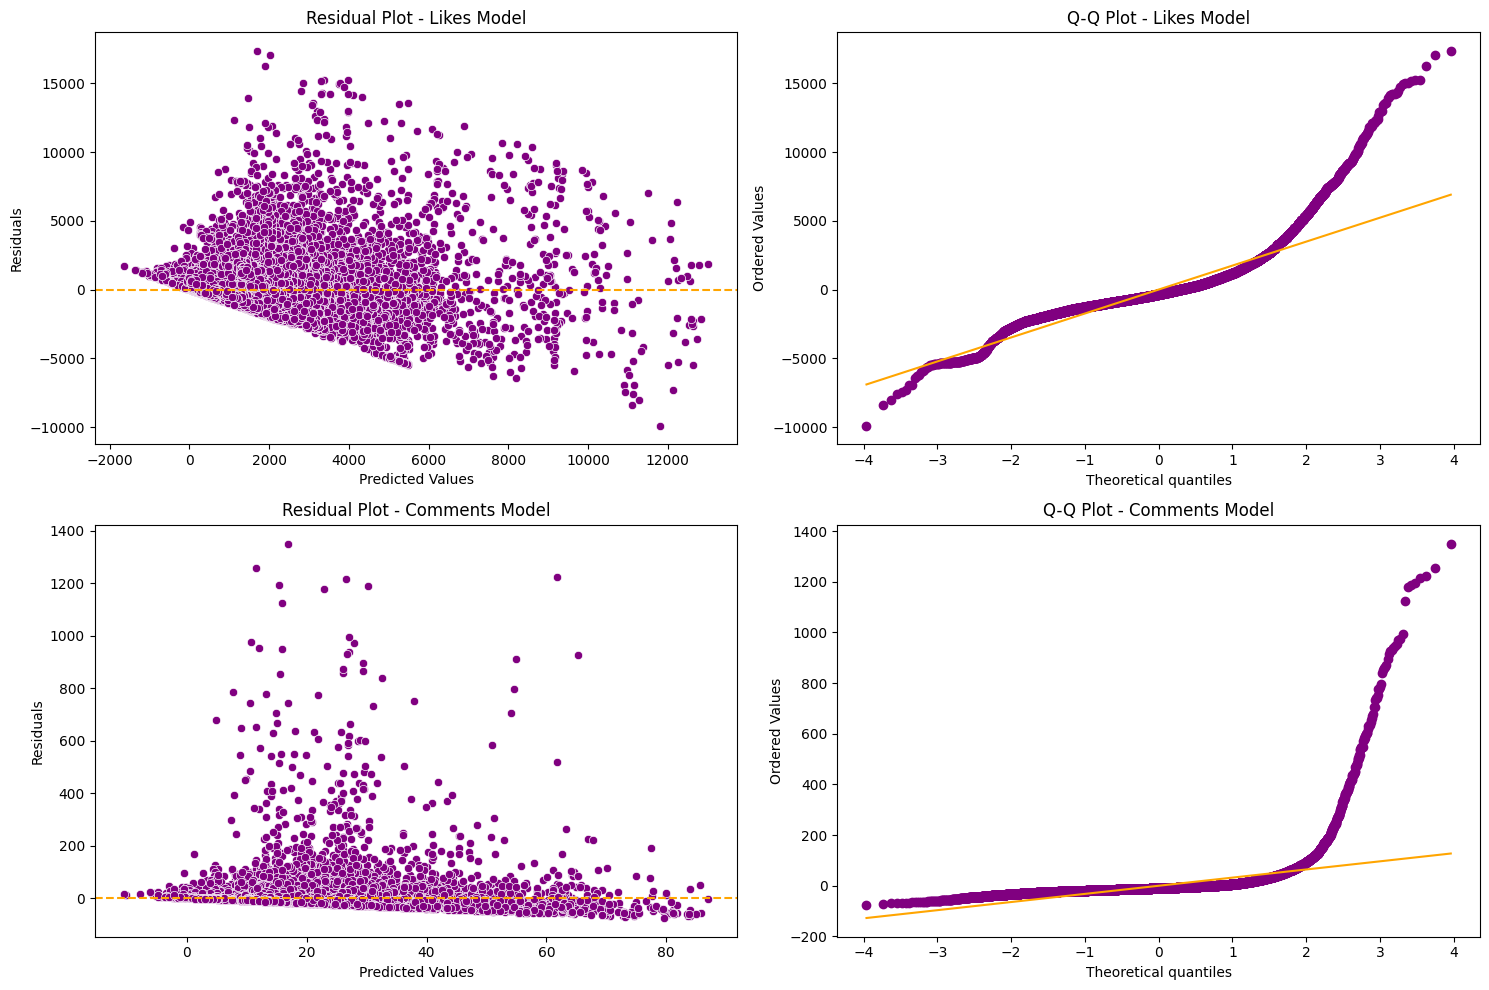

In [53]:
# Visualize residuals for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Likes model residual plot
sns.scatterplot(x=likes_predictions, y=likes_model.resid, color='purple', ax=axes[0,0])
axes[0,0].axhline(y=0, color='orange', linestyle='--')
axes[0,0].set_title('Residual Plot - Likes Model')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Likes model Q-Q plot
stats.probplot(likes_model.resid, dist="norm", plot=axes[0,1])
axes[0,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[0,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[0,1].get_lines()[1].set_color('orange')
axes[0,1].set_title('Q-Q Plot - Likes Model')

# Comments model residual plot
sns.scatterplot(x=comments_predictions, y=comments_model.resid, color='purple', ax=axes[1,0])
axes[1,0].axhline(y=0, color='orange', linestyle='--')
axes[1,0].set_title('Residual Plot - Comments Model')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')

# Comments model Q-Q plot
stats.probplot(comments_model.resid, dist="norm", plot=axes[1,1])
axes[1,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[1,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[1,1].get_lines()[1].set_color('orange')
axes[1,1].set_title('Q-Q Plot - Comments Model')

plt.tight_layout()
plt.show()

In [54]:
# Get feature names (excluding constant)
feature_names = IVs.columns

# Get feature names (excluding constant)
feature_names = IVs.columns

# Analyze likes model
likes_importance = analyze_coefficients(likes_model, feature_names, IVs, DV_likes)
print("\n=== Variable Importance for Likes Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(likes_importance)

# Analyze comments model
comments_importance = analyze_coefficients(comments_model, feature_names, IVs, DV_comments)
print("\n=== Variable Importance for Comments Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(comments_importance)


=== Variable Importance for Likes Model ===

Ranked by standardized coefficient magnitude (higher = more important):
                                   Feature  Coefficient  Standardized_Beta  \
num_followers                num_followers  1416.635407           0.573069   
num_following                num_following  -358.377812          -0.144974   
post_is_video                post_is_video  -697.759951          -0.083184   
count_of_exclamation  count_of_exclamation   180.043256           0.072833   
length_of_post              length_of_post  -107.073761          -0.043314   
popular_tag_count        popular_tag_count    97.129659           0.039292   
non_april_month            non_april_month  -380.463891          -0.038912   
num_hashtags                  num_hashtags   -86.343704          -0.034928   
is_morning                      is_morning  -229.010609          -0.030101   
Wednesday                        Wednesday   145.756972           0.018407   
Monday                  

In [55]:
# Analyze temporal effects
print("\n=== Temporal Effects Analysis ===")

# Day of week effects
day_vars_likes = likes_importance[likes_importance['Feature'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])]
best_day_likes = day_vars_likes.loc[day_vars_likes['Coefficient'].idxmax()]
print(f"\nBest day for likes: {best_day_likes['Feature']} (coefficient: {best_day_likes['Coefficient']:.3f})")

day_vars_comments = comments_importance[comments_importance['Feature'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])]
best_day_comments = day_vars_comments.loc[day_vars_comments['Coefficient'].idxmax()]
print(f"Best day for comments: {best_day_comments['Feature']} (coefficient: {best_day_comments['Coefficient']:.3f})")

# Time of day effects
time_vars_likes = likes_importance[likes_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on likes:")
print(time_vars_likes[['Feature', 'Coefficient', 'Significant']])

time_vars_comments = comments_importance[comments_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on comments:")
print(time_vars_comments[['Feature', 'Coefficient', 'Significant']])

# Month effects
month_effect_likes = likes_importance[likes_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on likes:")
print(month_effect_likes[['Feature', 'Coefficient', 'Significant']])

month_effect_comments = comments_importance[comments_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on comments:")
print(month_effect_comments[['Feature', 'Coefficient', 'Significant']])


=== Temporal Effects Analysis ===

Best day for likes: Wednesday (coefficient: 145.757)
Best day for comments: Tuesday (coefficient: 1.867)

Time of day effects on likes:
                           Feature  Coefficient  Significant
is_morning              is_morning  -229.010609         True
evening_or_night  evening_or_night    84.004298         True

Time of day effects on comments:
                           Feature  Coefficient  Significant
is_morning              is_morning    -2.259843        False
evening_or_night  evening_or_night     0.927047        False

Non-April vs April effect on likes:
                         Feature  Coefficient  Significant
non_april_month  non_april_month  -380.463891         True

Non-April vs April effect on comments:
                         Feature  Coefficient  Significant
non_april_month  non_april_month     -4.89199         True


# **Preparing for Question 3**

In [56]:
# Reminding ourselves of what we have
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   username              18505 non-null  object        
 1   num_followers         18505 non-null  int64         
 2   num_following         18505 non-null  int64         
 3   num_likes             18505 non-null  int64         
 4   num_comments          18505 non-null  int64         
 5   post_caption          18505 non-null  object        
 6   date_of_post          18505 non-null  datetime64[ns]
 7   num_users_in_photo    18505 non-null  Int64         
 8   link_to_post          18505 non-null  object        
 9   list_of_tags          18505 non-null  object        
 10  num_hashtags          18505 non-null  int64         
 11  list_of_mentions      18505 non-null  object        
 12  num_mentions          18505 non-null  int64         
 13  post_is_video   

In [57]:
# Creating the is_weekend variable
instagram_data['is_weekend'] = instagram_data['Saturday'] + instagram_data['Sunday']

# Creating the is_weekday variable
instagram_data['Friday'] = 0  # Friday was dropped need to add it back for a moment
instagram_data.loc[(instagram_data['Monday'] == 0) & (instagram_data['Tuesday'] == 0) & (instagram_data['Wednesday'] == 0) & (instagram_data['Thursday'] == 0) & (instagram_data['Saturday'] == 0) & (instagram_data['Sunday'] == 0), 'Friday'] = 1
instagram_data['is_weekday'] = instagram_data['Monday'] + instagram_data['Tuesday'] + instagram_data['Wednesday'] + instagram_data['Thursday'] + instagram_data['Friday']
# Whoops, we realized we don't need is_weekday, but decided to keep this code in case we need it later...

In [58]:
instagram_data.head()

username  num_followers  num_following  num_likes  num_comments  \
0  marakiiliaki         365995           1160      13198            24   
1  marakiiliaki         365995           1160       9944            21   
2  marakiiliaki         365995           1160       6507            23   
3  marakiiliaki         365995           1160       9980            24   
4  marakiiliaki         365995           1160      12934            39   

                                        post_caption        date_of_post  \
0           Μεγάλη Παρασκευή στο νησί...#happyeaster 2017-04-14 17:06:52   
1                              Αιγαίο...#happyeaster 2017-04-15 14:38:22   
2                            Μόνο εσύ @aremovic .... 2017-04-17 02:11:06   
3                     Δε σε φοβάμαι...#easter #tinos 2017-04-17 20:35:58   
4  Στο mariailiaki.gr λατρεύουμε τις φουστες?????... 2017-04-18 10:04:47   

   num_users_in_photo                              link_to_post  \
0                   0  https://www.instagram.com/p/BS3ldNxB_Sc/   
1                   0  https://www.instagram.com/p/BS55QZaBQK2/   
2                   0  https://www.instagram.com/p/BS9tVBkhQwB/   
3                   1  https://www.instagram.com/p/BS_rxSpBhvi/   
4                   0  https://www.instagram.com/p/BTBIVQSBsnJ/   

                 list_of_tags  ...  Wednesday is_morning  evening_or_night  \
0                #happyeaster  ...          0          0                 1   
1                #happyeaster  ...          0          0                 0   
2                              ...          0          0                 1   
3              #easter #tinos  ...          0          0                 1   
4  #mariailiakigr #instastyle  ...          0          1                 0   

   non_april_month  count_of_question  count_of_exclamation  \
0                0                  0                     0   
1                0                  0                     0   
2                0                  0                     0   
3                0                  0                     0   
4                0                  6                     0   

   popular_tag_count  is_weekend  Friday  is_weekday  
0                  0           0       1           1  
1                  0           1       0           0  
2                  0           0       0           1  
3                  0           0       0           1  
4                  0           0       0           1  

[5 rows x 30 columns]

In [59]:
# Make a copy of instagram_data just in case
instagram_data_copy_q3 = instagram_data.copy()

# Dropping columns unnecessary for linear regression analysis
columns_to_keep_q3 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'post_is_video',
                      'length_of_post', 'non_april_month','is_morning', 'evening_or_night', 'is_weekend',
                      'num_likes', 'num_comments']

insta_data_q3 = instagram_data_copy_q3[columns_to_keep_q3]
insta_data_q3.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0         365995           1160                   0             1   
1         365995           1160                   0             1   
2         365995           1160                   0             0   
3         365995           1160                   1             2   
4         365995           1160                   0             2   

   num_mentions  post_is_video  length_of_post  non_april_month  is_morning  \
0             0              0              40                0           0   
1             0              0              21                0           0   
2             1              1              23                0           0   
3             0              0              30                0           0   
4             2              0             111                0           1   

   evening_or_night  is_weekend  num_likes  num_comments  
0                 1           0      13198            24  
1                 0           1       9944            21  
2                 1           0       6507            23  
3                 1           0       9980            24  
4                 0           0      12934            39

In [60]:
# Standardizing all the continuous numeric columns (not including dummy coded)
columns_to_standardize_q3 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'length_of_post']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
instagram_data_scaled_q3 = insta_data_q3.copy()  # created a copy to not modify original
instagram_data_scaled_q3[columns_to_standardize_q3] = scaler.fit_transform(instagram_data[columns_to_standardize_q3])

# Double check it worked where mean is close to 0 and std is close to 1
print(instagram_data_scaled_q3[columns_to_standardize_q3].describe())

       num_followers  num_following  num_users_in_photo  num_hashtags  \
count   1.850500e+04   1.850500e+04        1.850500e+04  1.850500e+04   
mean    6.143574e-17   3.071787e-18       -2.457430e-17 -3.071787e-17   
std     1.000027e+00   1.000027e+00        1.000027e+00  1.000027e+00   
min    -7.421306e-01  -6.563465e-01       -9.386484e-01 -7.592888e-01   
25%    -6.229340e-01  -5.862785e-01       -9.386484e-01 -7.592888e-01   
50%    -3.465435e-01  -4.386510e-01        1.798119e-01 -4.139483e-01   
75%     1.916501e-01  -5.393826e-02        1.798119e-01  2.767328e-01   
max     7.380184e+00   2.686645e+00        5.772113e+00  3.039457e+00   

       num_mentions  length_of_post  
count  1.850500e+04    1.850500e+04  
mean  -3.686144e-17    5.759601e-17  
std    1.000027e+00    1.000027e+00  
min   -5.621070e-01   -8.401391e-01  
25%   -5.621070e-01   -6.296943e-01  
50%   -5.621070e-01   -2.974131e-01  
75%    4.933765e-01    3.339212e-01  
max    4.715311e+00    1.129366e+01  


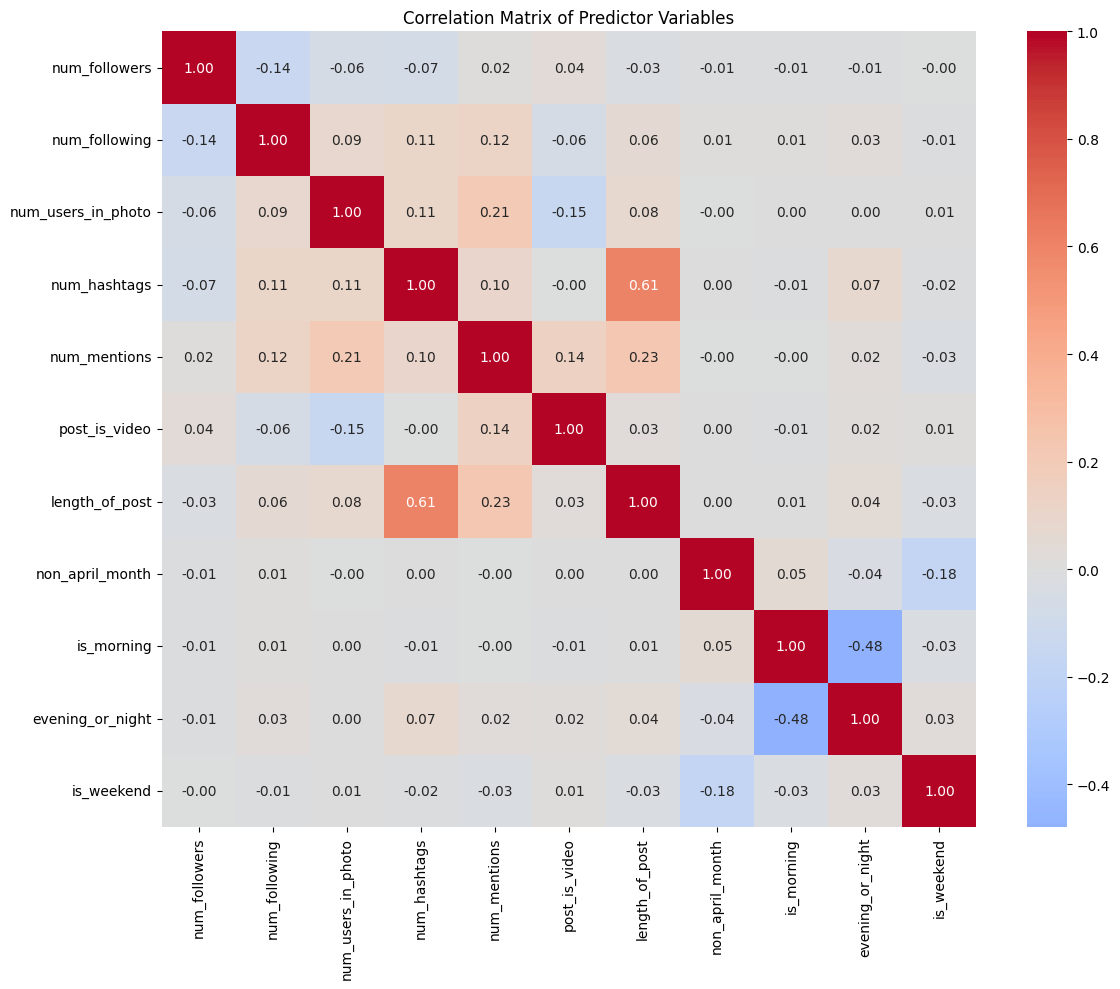

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Testing for multicollinearity
independent_variables_scaled_q3 = instagram_data_scaled_q3.drop(['num_likes', 'num_comments'], axis=1) # drop dependent variables
correlation_matrix_q3 = independent_variables_scaled_q3.corr()

# Visualizing corr. matrix as a heatmap for easier interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_q3,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables')
plt.tight_layout()
plt.show()

In [62]:
# Calculate VIF to also test for multicolinearity
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_variables_scaled_q3.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_variables_scaled_q3.values, i)
                       for i in range(independent_variables_scaled_q3.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(independent_variables_scaled_q3)

print("\nVariance Inflation Factors:")
print(vif_results)


Variance Inflation Factors:
              Variable       VIF
6       length_of_post  1.653432
3         num_hashtags  1.615721
9     evening_or_night  1.393604
10          is_weekend  1.338457
4         num_mentions  1.152447
5        post_is_video  1.151476
2   num_users_in_photo  1.096764
8           is_morning  1.075112
7      non_april_month  1.073592
1        num_following  1.053292
0        num_followers  1.029016


In [63]:
# Double check that everything is good to go...
instagram_data_scaled_q3.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0       7.380184      -0.145159           -0.938648     -0.644175   
1       7.380184      -0.145159           -0.938648     -0.644175   
2       7.380184      -0.145159           -0.938648     -0.759289   
3       7.380184      -0.145159            0.179812     -0.529062   
4       7.380184      -0.145159           -0.938648     -0.529062   

   num_mentions  post_is_video  length_of_post  non_april_month  is_morning  \
0     -0.562107              0       -0.618618                0           0   
1     -0.562107              0       -0.723841                0           0   
2      0.493377              1       -0.712765                0           0   
3     -0.562107              0       -0.673998                0           0   
4      1.548860              0       -0.225419                0           1   

   evening_or_night  is_weekend  num_likes  num_comments  
0                 1           0      13198            24  
1                 0           1       9944            21  
2                 1           0       6507            23  
3                 1           0       9980            24  
4                 0           0      12934            39

# **Question 3 Linear Regression with "Is Weekend"**

In [64]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define independent variables for both models
IVs = instagram_data_scaled_q3[['num_followers', 'num_following', 'num_users_in_photo',
                               'num_hashtags', 'num_mentions', 'post_is_video',
                               'length_of_post', 'non_april_month','is_morning',
                                'evening_or_night', 'is_weekend']]

# Model 1: Predicting Likes
DV_likes = instagram_data_scaled_q3['num_likes']

# Add constant and fit likes model
IVs_with_const = sm.add_constant(IVs)
likes_model = sm.OLS(DV_likes, IVs_with_const).fit()

# Calculate RMSE for likes model
likes_predictions = likes_model.predict(IVs_with_const)
likes_rmse = np.sqrt(mean_squared_error(DV_likes, likes_predictions))

# Model 2: Predicting Comments
DV_comments = instagram_data_scaled_q3['num_comments']

# Fit comments model (using same IVs_with_const)
comments_model = sm.OLS(DV_comments, IVs_with_const).fit()

# Calculate RMSE for comments model
comments_predictions = comments_model.predict(IVs_with_const)
comments_rmse = np.sqrt(mean_squared_error(DV_comments, comments_predictions))

In [65]:
# Print results
print("=== Model 1: Predicting Number of Likes ===")
print("\nModel Summary:")
print(likes_model.summary())
print(f"\nRoot Mean Squared Error for Likes Model: {likes_rmse:.2f}")

print("\n=== Model 2: Predicting Number of Comments ===")
print("\nModel Summary:")
print(comments_model.summary())
print(f"\nRoot Mean Squared Error for Comments Model: {comments_rmse:.2f}")

=== Model 1: Predicting Number of Likes ===

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              num_likes   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     1082.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:29:23   Log-Likelihood:            -1.6624e+05
No. Observations:               18505   AIC:                         3.325e+05
Df Residuals:                   18493   BIC:                         3.326e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

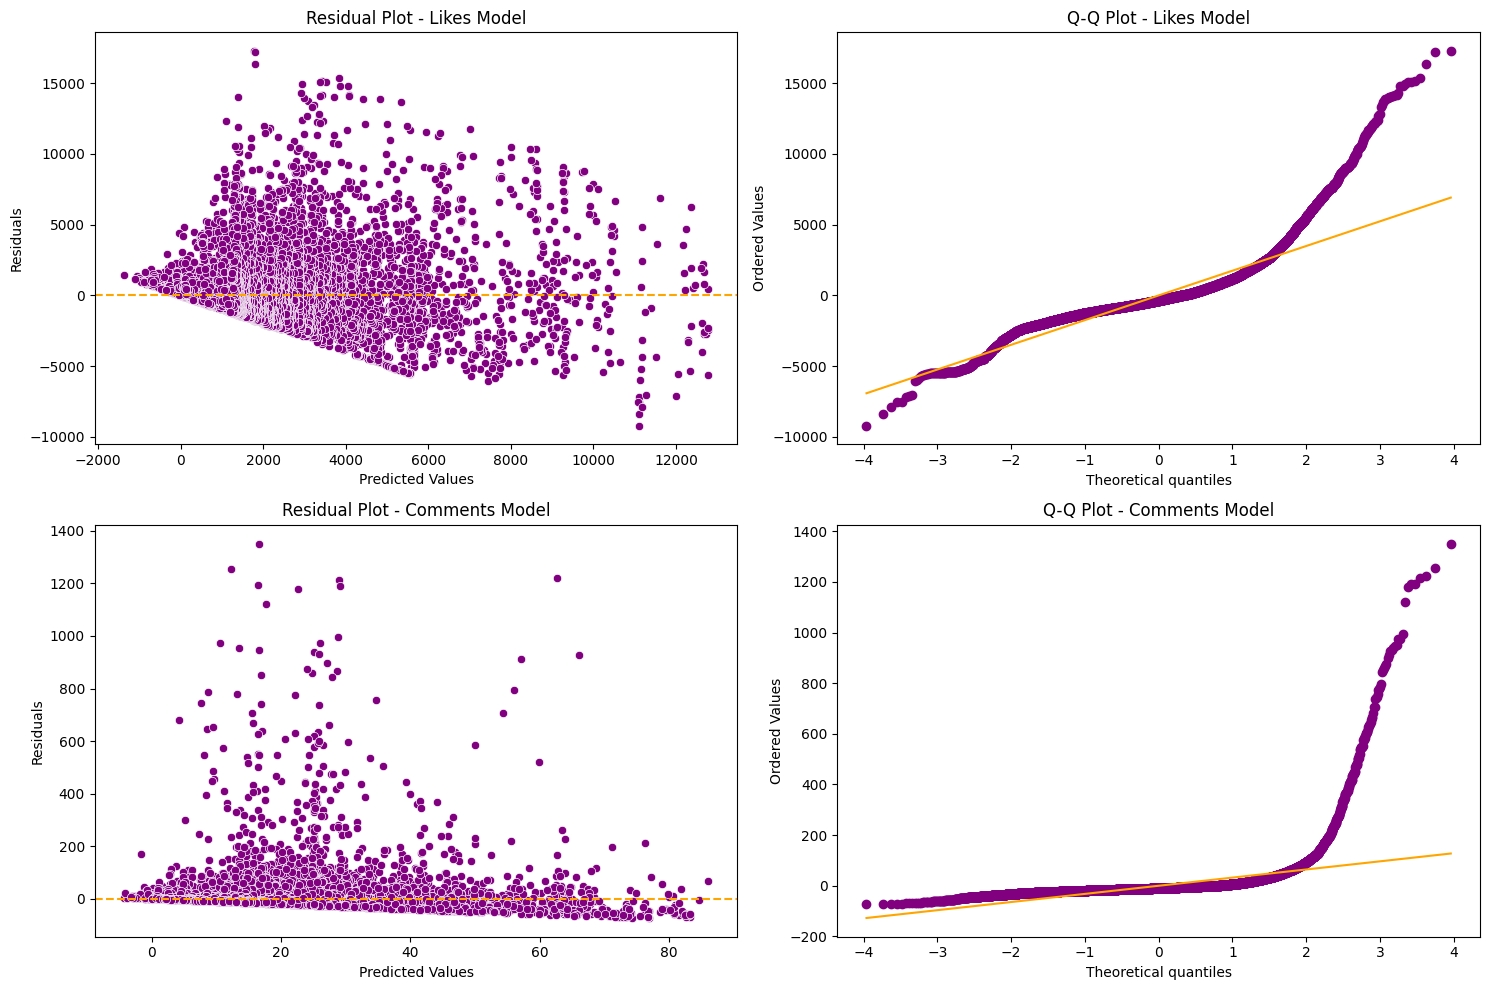

In [66]:
# Visualize residuals for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Likes model residual plot
sns.scatterplot(x=likes_predictions, y=likes_model.resid, color='purple', ax=axes[0,0])
axes[0,0].axhline(y=0, color='orange', linestyle='--')
axes[0,0].set_title('Residual Plot - Likes Model')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Likes model Q-Q plot
stats.probplot(likes_model.resid, dist="norm", plot=axes[0,1])
axes[0,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[0,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[0,1].get_lines()[1].set_color('orange')
axes[0,1].set_title('Q-Q Plot - Likes Model')

# Comments model residual plot
sns.scatterplot(x=comments_predictions, y=comments_model.resid, color='purple', ax=axes[1,0])
axes[1,0].axhline(y=0, color='orange', linestyle='--')
axes[1,0].set_title('Residual Plot - Comments Model')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')

# Comments model Q-Q plot
stats.probplot(comments_model.resid, dist="norm", plot=axes[1,1])
axes[1,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[1,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[1,1].get_lines()[1].set_color('orange')
axes[1,1].set_title('Q-Q Plot - Comments Model')

plt.tight_layout()
plt.show()

In [67]:
# Get feature names (excluding constant)
feature_names = IVs.columns

# Analyze likes model
likes_importance = analyze_coefficients(likes_model, feature_names, IVs, DV_likes)
print("\n=== Variable Importance for Likes Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(likes_importance)

# Analyze comments model
comments_importance = analyze_coefficients(comments_model, feature_names, IVs, DV_comments)
print("\n=== Variable Importance for Comments Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(comments_importance)


=== Variable Importance for Likes Model ===

Ranked by standardized coefficient magnitude (higher = more important):
                               Feature  Coefficient  Standardized_Beta  \
num_followers            num_followers  1424.185996           0.576124   
num_following            num_following  -369.707230          -0.149557   
post_is_video            post_is_video  -710.459512          -0.084698   
non_april_month        non_april_month  -324.270483          -0.033165   
is_morning                  is_morning  -227.680998          -0.029927   
length_of_post          length_of_post   -72.411057          -0.029292   
num_hashtags              num_hashtags   -50.586977          -0.020464   
num_users_in_photo  num_users_in_photo   -34.238936          -0.013851   
evening_or_night      evening_or_night    68.957813           0.013482   
num_mentions              num_mentions   -18.724139          -0.007574   
is_weekend                  is_weekend   -36.144058          -0.0067

In [68]:
print("\n=== Temporal Effects Analysis ===")

# Weekend effect
weekend_effect_likes = likes_importance[likes_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on likes:")
print(weekend_effect_likes[['Feature', 'Coefficient', 'Significant']])

weekend_effect_comments = comments_importance[comments_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on comments:")
print(weekend_effect_comments[['Feature', 'Coefficient', 'Significant']])

# Time of day effects
time_vars_likes = likes_importance[likes_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on likes:")
print(time_vars_likes[['Feature', 'Coefficient', 'Significant']])

time_vars_comments = comments_importance[comments_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on comments:")
print(time_vars_comments[['Feature', 'Coefficient', 'Significant']])

# Month effects
month_effect_likes = likes_importance[likes_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on likes:")
print(month_effect_likes[['Feature', 'Coefficient', 'Significant']])

month_effect_comments = comments_importance[comments_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on comments:")
print(month_effect_comments[['Feature', 'Coefficient', 'Significant']])


=== Temporal Effects Analysis ===

Weekend vs Weekday effect on likes:
               Feature  Coefficient  Significant
is_weekend  is_weekend   -36.144058        False

Weekend vs Weekday effect on comments:
               Feature  Coefficient  Significant
is_weekend  is_weekend     0.022136        False

Time of day effects on likes:
                           Feature  Coefficient  Significant
is_morning              is_morning  -227.680998         True
evening_or_night  evening_or_night    68.957813         True

Time of day effects on comments:
                           Feature  Coefficient  Significant
is_morning              is_morning    -2.315638        False
evening_or_night  evening_or_night     1.015443        False

Non-April vs April effect on likes:
                         Feature  Coefficient  Significant
non_april_month  non_april_month  -324.270483         True

Non-April vs April effect on comments:
                         Feature  Coefficient  Significant
non_apr

# **Preparing for Question 4**

In [69]:
# Reminding ourselves of what we have
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   username              18505 non-null  object        
 1   num_followers         18505 non-null  int64         
 2   num_following         18505 non-null  int64         
 3   num_likes             18505 non-null  int64         
 4   num_comments          18505 non-null  int64         
 5   post_caption          18505 non-null  object        
 6   date_of_post          18505 non-null  datetime64[ns]
 7   num_users_in_photo    18505 non-null  Int64         
 8   link_to_post          18505 non-null  object        
 9   list_of_tags          18505 non-null  object        
 10  num_hashtags          18505 non-null  int64         
 11  list_of_mentions      18505 non-null  object        
 12  num_mentions          18505 non-null  int64         
 13  post_is_video   

In [70]:
# Add all rows with num_followers > 50000 to new dataframe called macro_influencers
macro_influencers = pd.DataFrame(columns=instagram_data.columns)
for index, row in instagram_data.iterrows():
    if row['num_followers'] > 50000:
        macro_influencers = pd.concat([macro_influencers, pd.DataFrame([row])], ignore_index=True)

# Add all rows with num_followers <= 5000 to new dataframe called micro_influencers
micro_influencers = pd.DataFrame(columns=instagram_data.columns)
for index, row in instagram_data.iterrows():
    if row['num_followers'] <= 50000:
        micro_influencers = pd.concat([micro_influencers, pd.DataFrame([row])], ignore_index=True)

<ipython-input-70-b51fb92824ad>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  macro_influencers = pd.concat([macro_influencers, pd.DataFrame([row])], ignore_index=True)
<ipython-input-70-b51fb92824ad>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  micro_influencers = pd.concat([micro_influencers, pd.DataFrame([row])], ignore_index=True)


In [71]:
# Fixing the types (for whatever reason what we just did made some types be object out of nowhere)
for col in micro_influencers.columns:
  try:
    micro_influencers[col] = pd.to_numeric(micro_influencers[col], errors='coerce')
  except:
    pass # Skip non-numeric columns

# Check for any non-numeric columns left
non_numeric_cols = micro_influencers.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in 'micro_influencers': {non_numeric_cols}")

# Filling all the NA/NaN values with 0
micro_influencers.fillna(0, inplace=True)

# Convert appropriate columns to int or float
for col in micro_influencers.columns:
  if pd.api.types.is_numeric_dtype(micro_influencers[col]):
    if micro_influencers[col].astype(int).equals(micro_influencers[col]):
      micro_influencers[col] = micro_influencers[col].astype(int)
    else:
      micro_influencers[col] = micro_influencers[col].astype(float)

Non-numeric columns in 'micro_influencers': Index([], dtype='object')


In [72]:
# Fixing the types (for whatever reason what we just did made some types be object out of nowhere)
for col in macro_influencers.columns:
  try:
    macro_influencers[col] = pd.to_numeric(macro_influencers[col], errors='coerce')
  except:
    pass # Skip non-numeric columns

# Check for any non-numeric columns left
non_numeric_cols = macro_influencers.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in 'macro_influencers': {non_numeric_cols}")

# Filling all the NA/NaN values with 0
macro_influencers.fillna(0, inplace=True)

# Convert appropriate columns to int or float
for col in macro_influencers.columns:
  if pd.api.types.is_numeric_dtype(macro_influencers[col]):
    if macro_influencers[col].astype(int).equals(macro_influencers[col]):
      macro_influencers[col] = macro_influencers[col].astype(int)
    else:
      macro_influencers[col] = macro_influencers[col].astype(float)

Non-numeric columns in 'macro_influencers': Index([], dtype='object')


In [73]:
# Make a copy of macro_influencers and micro_influencers just in case
macro_influencers_copy_q4 = macro_influencers.copy()
micro_influencers_copy_q4 = micro_influencers.copy()

# Dropping columns unnecessary for linear regression analysis
columns_to_keep_q4 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'post_is_video',
                      'length_of_post', 'non_april_month','is_morning', 'evening_or_night', 'is_weekend', 'count_of_question',
                      'count_of_exclamation', 'popular_tag_count',
                      'num_likes', 'num_comments']

macro_influencers_q4 = macro_influencers_copy_q4[columns_to_keep_q4]
micro_influencers_q4 = micro_influencers_copy_q4[columns_to_keep_q4]

In [74]:
# Standardizing all the continuous numeric columns (not including dummy coded)
columns_to_standardize_q4 = ['num_followers', 'num_following', 'num_users_in_photo', 'num_hashtags', 'num_mentions', 'length_of_post',
                             'count_of_question', 'count_of_exclamation', 'popular_tag_count',]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Doing both macro and micro
macro_influencers_scaled_q4 = macro_influencers_q4.copy()  # created a copy to not modify original
macro_influencers_scaled_q4[columns_to_standardize_q4] = scaler.fit_transform(macro_influencers[columns_to_standardize_q4])

micro_influencers_scaled_q4 = micro_influencers_q4.copy()  # created a copy to not modify original
micro_influencers_scaled_q4[columns_to_standardize_q4] = scaler.fit_transform(micro_influencers[columns_to_standardize_q4])

# Double check it worked where mean is close to 0 and std is close to 1
print(macro_influencers_scaled_q4[columns_to_standardize_q4].describe())
print(micro_influencers_scaled_q4[columns_to_standardize_q4].describe())

       num_followers  num_following  num_users_in_photo  num_hashtags  \
count   5.729000e+03   5.729000e+03        5.729000e+03  5.729000e+03   
mean    7.937639e-17   5.457127e-17       -5.457127e-17  2.480512e-17   
std     1.000087e+00   1.000087e+00        1.000087e+00  1.000087e+00   
min    -8.522533e-01  -5.806670e-01       -5.730944e-01 -6.205658e-01   
25%    -6.104865e-01  -4.827792e-01       -5.730944e-01 -6.205658e-01   
50%    -4.125342e-01  -3.475717e-01       -5.730944e-01 -3.673269e-01   
75%     2.318297e-01  -2.454200e-02        2.247811e-01  1.253155e-02   
max     5.137997e+00   4.060437e+00        4.214159e+00  3.557877e+00   

       num_mentions  length_of_post  count_of_question  count_of_exclamation  \
count  5.729000e+03    5.729000e+03       5.729000e+03          5.729000e+03   
mean   5.953229e-17    3.472717e-17       3.968820e-17         -1.984410e-17   
std    1.000087e+00    1.000087e+00       1.000087e+00          1.000087e+00   
min   -5.583499e-01   

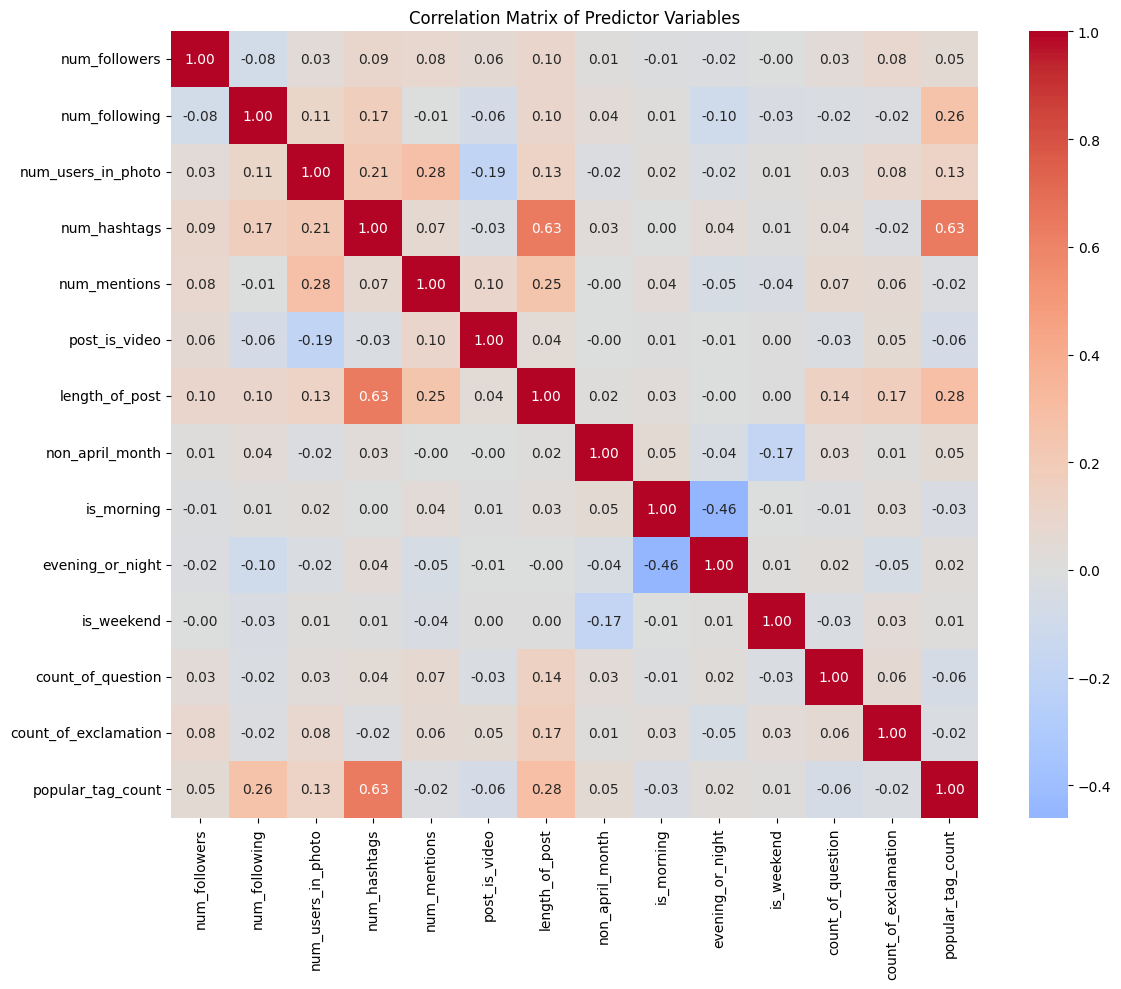

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Testing for multicollinearity in macro influencer columns
independent_variables_macro_q4 = macro_influencers_scaled_q4.drop(['num_likes', 'num_comments'], axis=1) # drop dependent variables
correlation_matrix_macro_q4 = independent_variables_macro_q4.corr()

# Visualizing corr. matrix as a heatmap for easier interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_macro_q4,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables')
plt.tight_layout()
plt.show()

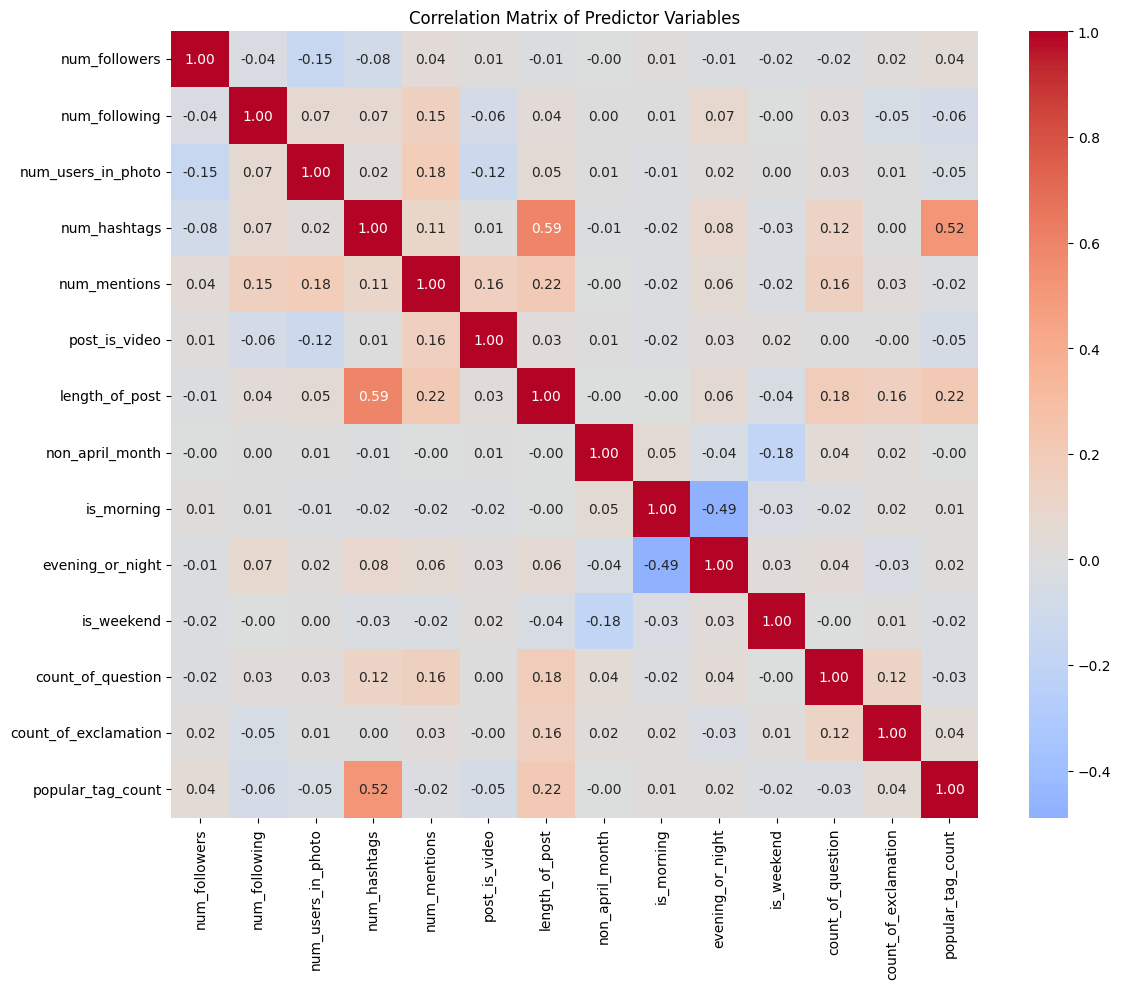

In [76]:
# Testing for multicollinearity
independent_variables_micro_q4 = micro_influencers_scaled_q4.drop(['num_likes', 'num_comments'], axis=1) # drop dependent variables
correlation_matrix_micro_q4 = independent_variables_micro_q4.corr()

# Visualizing corr. matrix as a heatmap for easier interpretability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_micro_q4,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Predictor Variables')
plt.tight_layout()
plt.show()

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Makes sure all variables are numeric
X = independent_variables_micro_q4.select_dtypes(include=['float64', 'int64'])

# Calculating VIF manually for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value
print(vif_data.sort_values('VIF', ascending=False))

                Variable       VIF
3           num_hashtags  2.174875
6         length_of_post  1.713002
13     popular_tag_count  1.468106
9       evening_or_night  1.413124
10            is_weekend  1.346654
4           num_mentions  1.174223
5          post_is_video  1.157618
2     num_users_in_photo  1.092081
7        non_april_month  1.081170
8             is_morning  1.075180
11     count_of_question  1.069603
12  count_of_exclamation  1.060997
1          num_following  1.056866
0          num_followers  1.051339


In [78]:
# Makes sure all variables are numeric
X = independent_variables_macro_q4.select_dtypes(include=['float64', 'int64'])

# Calculate VIF manually for each column
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value
print(vif_data.sort_values('VIF', ascending=False))

                Variable       VIF
3           num_hashtags  2.795132
6         length_of_post  1.977523
13     popular_tag_count  1.825482
9       evening_or_night  1.379296
10            is_weekend  1.330637
2     num_users_in_photo  1.218731
4           num_mentions  1.206975
5          post_is_video  1.168033
1          num_following  1.101612
8             is_morning  1.084380
12  count_of_exclamation  1.079544
7        non_april_month  1.070876
11     count_of_question  1.036909
0          num_followers  1.035002


In [79]:
macro_influencers_scaled_q4.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0       5.137997       0.129019           -0.573094     -0.493946   
1       5.137997       0.129019           -0.573094     -0.493946   
2       5.137997       0.129019           -0.573094     -0.620566   
3       5.137997       0.129019            0.224781     -0.367327   
4       5.137997       0.129019           -0.573094     -0.367327   

   num_mentions  post_is_video  length_of_post  non_april_month  is_morning  \
0     -0.558350              0       -0.584748                0           0   
1     -0.558350              0       -0.708581                0           0   
2      0.565214              1       -0.695546                0           0   
3     -0.558350              0       -0.649923                0           0   
4      1.688778              0       -0.122006                0           1   

   evening_or_night  is_weekend  count_of_question  count_of_exclamation  \
0                 1           0          -0.649113             -0.433782   
1                 0           1          -0.649113             -0.433782   
2                 1           0          -0.649113             -0.433782   
3                 1           0          -0.649113             -0.433782   
4                 0           0           1.928590             -0.433782   

   popular_tag_count  num_likes  num_comments  
0          -0.321303      13198            24  
1          -0.321303       9944            21  
2          -0.321303       6507            23  
3          -0.321303       9980            24  
4          -0.321303      12934            39

In [80]:
macro_influencers_scaled_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_followers         5729 non-null   float64
 1   num_following         5729 non-null   float64
 2   num_users_in_photo    5729 non-null   float64
 3   num_hashtags          5729 non-null   float64
 4   num_mentions          5729 non-null   float64
 5   post_is_video         5729 non-null   int64  
 6   length_of_post        5729 non-null   float64
 7   non_april_month       5729 non-null   int64  
 8   is_morning            5729 non-null   int64  
 9   evening_or_night      5729 non-null   int64  
 10  is_weekend            5729 non-null   int64  
 11  count_of_question     5729 non-null   float64
 12  count_of_exclamation  5729 non-null   float64
 13  popular_tag_count     5729 non-null   float64
 14  num_likes             5729 non-null   int64  
 15  num_comments         

In [81]:
micro_influencers_scaled_q4.head()

num_followers  num_following  num_users_in_photo  num_hashtags  \
0       2.227051      -0.490145            0.159879     -0.600819   
1       2.227051      -0.490145           -1.340941      0.633112   
2       2.211369      -0.561982           -1.340941     -0.376468   
3       2.211369      -0.561982           -1.340941     -0.488643   
4       2.207993       2.287556            0.159879      2.540097   

   num_mentions  post_is_video  length_of_post  non_april_month  is_morning  \
0      0.464643              0        1.523231                0           1   
1     -0.564532              0        0.421865                1           1   
2     -0.564532              0       -0.485450                0           0   
3     -0.564532              0       -0.527407                0           0   
4      0.464643              0        7.108729                0           0   

   evening_or_night  is_weekend  count_of_question  count_of_exclamation  \
0                 0           0          -0.487212              0.950874   
1                 0           1          -0.487212              0.271245   
2                 1           0          -0.487212             -0.408384   
3                 1           1           0.329918              1.630503   
4                 1           0           0.329918              0.271245   

   popular_tag_count  num_likes  num_comments  
0          -0.479289       3780            12  
1           1.318186         46             0  
2          -0.479289       1305            28  
3          -0.479289        925             7  
4          -0.479289       1226            19

In [82]:
micro_influencers_scaled_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12776 entries, 0 to 12775
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_followers         12776 non-null  float64
 1   num_following         12776 non-null  float64
 2   num_users_in_photo    12776 non-null  float64
 3   num_hashtags          12776 non-null  float64
 4   num_mentions          12776 non-null  float64
 5   post_is_video         12776 non-null  int64  
 6   length_of_post        12776 non-null  float64
 7   non_april_month       12776 non-null  int64  
 8   is_morning            12776 non-null  int64  
 9   evening_or_night      12776 non-null  int64  
 10  is_weekend            12776 non-null  int64  
 11  count_of_question     12776 non-null  float64
 12  count_of_exclamation  12776 non-null  float64
 13  popular_tag_count     12776 non-null  float64
 14  num_likes             12776 non-null  int64  
 15  num_comments       

# **Question 4 Macro Linear Regression**

In [83]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define independent variables for both models
IVs = macro_influencers_scaled_q4[['num_followers', 'num_following', 'num_users_in_photo',
                                   'num_hashtags', 'num_mentions', 'post_is_video',
                                   'length_of_post', 'non_april_month','is_morning',
                                   'count_of_question', 'count_of_exclamation', 'popular_tag_count',
                                   'evening_or_night', 'is_weekend']]

# Model 1: Predicting Likes
DV_likes = macro_influencers_scaled_q4['num_likes']

# Add constant and fit likes model
IVs_with_const = sm.add_constant(IVs)
likes_model = sm.OLS(DV_likes, IVs_with_const).fit()

# Calculate RMSE for likes model
likes_predictions = likes_model.predict(IVs_with_const)
likes_rmse = np.sqrt(mean_squared_error(DV_likes, likes_predictions))

# Model 2: Predicting Comments
DV_comments = macro_influencers_scaled_q4['num_comments']

# Fit comments model (using same IVs_with_const)
comments_model = sm.OLS(DV_comments, IVs_with_const).fit()

# Calculate RMSE for comments model
comments_predictions = comments_model.predict(IVs_with_const)
comments_rmse = np.sqrt(mean_squared_error(DV_comments, comments_predictions))

In [84]:
# Print results
print("=== Model 1: Predicting Number of Likes ===")
print("\nModel Summary:")
print(likes_model.summary())
print(f"\nRoot Mean Squared Error for Likes Model: {likes_rmse:.2f}")

print("\n=== Model 2: Predicting Number of Comments ===")
print("\nModel Summary:")
print(comments_model.summary())
print(f"\nRoot Mean Squared Error for Comments Model: {comments_rmse:.2f}")

=== Model 1: Predicting Number of Likes ===

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              num_likes   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:30:41   Log-Likelihood:                -53481.
No. Observations:                5729   AIC:                         1.070e+05
Df Residuals:                    5714   BIC:                         1.071e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

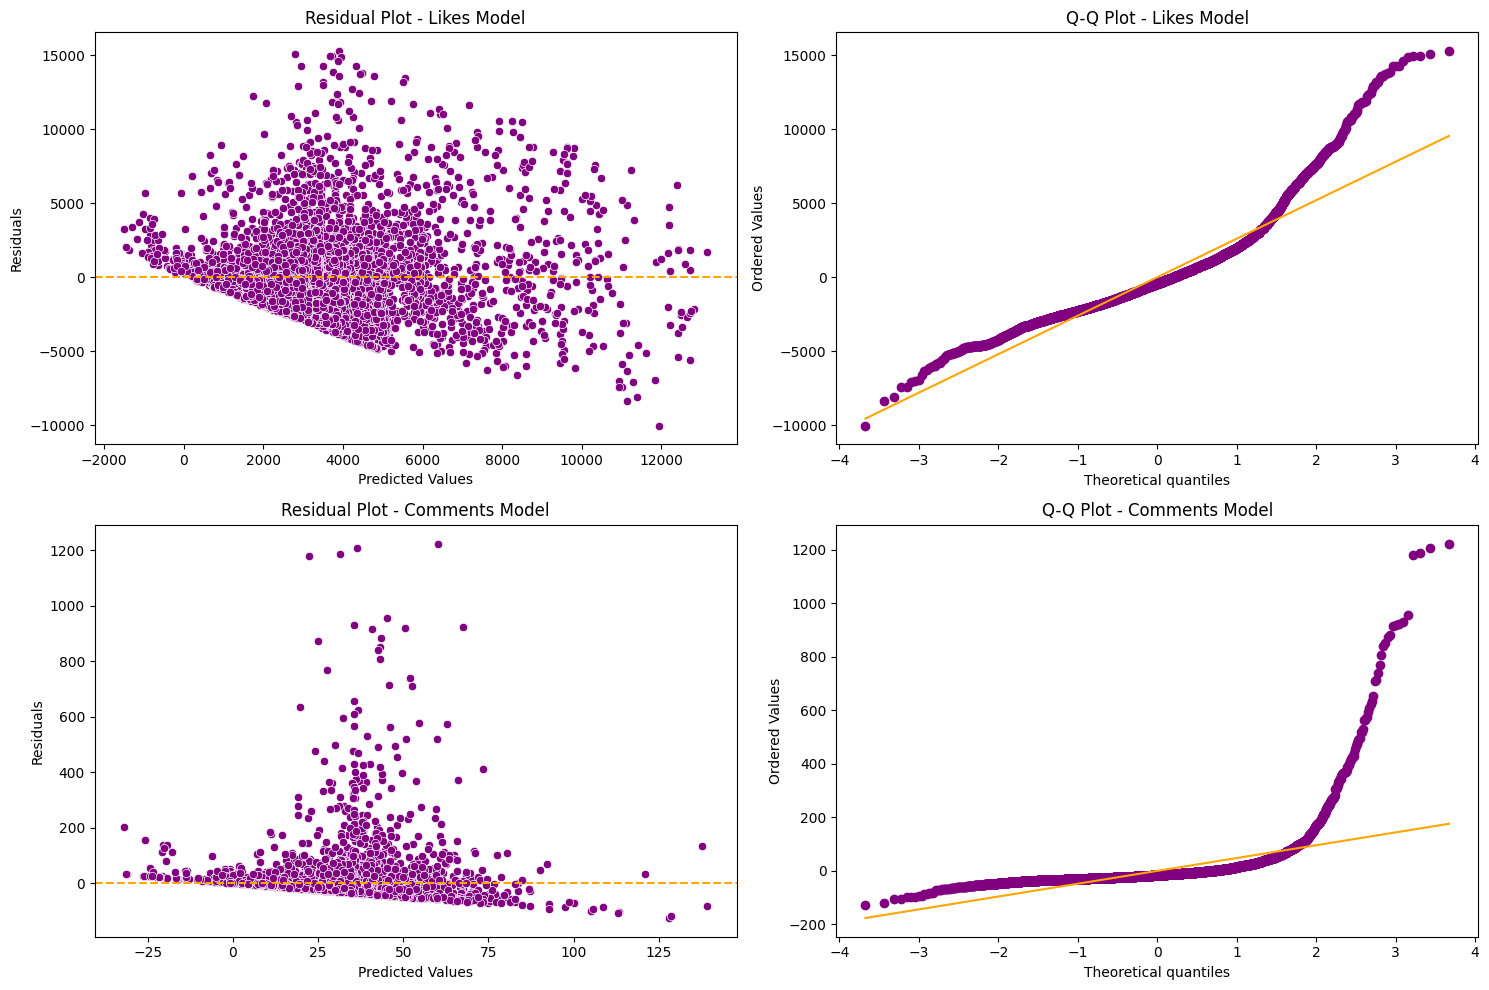

In [85]:
# Visualize residuals for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Likes model residual plot
sns.scatterplot(x=likes_predictions, y=likes_model.resid, color='purple', ax=axes[0,0])
axes[0,0].axhline(y=0, color='orange', linestyle='--')
axes[0,0].set_title('Residual Plot - Likes Model')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Likes model Q-Q plot
stats.probplot(likes_model.resid, dist="norm", plot=axes[0,1])
axes[0,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[0,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[0,1].get_lines()[1].set_color('orange')
axes[0,1].set_title('Q-Q Plot - Likes Model')

# Comments model residual plot
sns.scatterplot(x=comments_predictions, y=comments_model.resid, color='purple', ax=axes[1,0])
axes[1,0].axhline(y=0, color='orange', linestyle='--')
axes[1,0].set_title('Residual Plot - Comments Model')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')

# Comments model Q-Q plot
stats.probplot(comments_model.resid, dist="norm", plot=axes[1,1])
axes[1,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[1,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[1,1].get_lines()[1].set_color('orange')
axes[1,1].set_title('Q-Q Plot - Comments Model')

plt.tight_layout()
plt.show()

In [86]:
# Get feature names (excluding constant)
feature_names = IVs.columns

# Analyze likes model
likes_importance = analyze_coefficients(likes_model, feature_names, IVs, DV_likes)
print("\n=== Variable Importance for Likes Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(likes_importance)

# Analyze comments model
comments_importance = analyze_coefficients(comments_model, feature_names, IVs, DV_comments)
print("\n=== Variable Importance for Comments Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(comments_importance)


=== Variable Importance for Likes Model ===

Ranked by standardized coefficient magnitude (higher = more important):
                                   Feature  Coefficient  Standardized_Beta  \
num_followers                num_followers  1692.094968           0.506077   
num_following                num_following  -565.496932          -0.169131   
post_is_video                post_is_video -1104.755607          -0.100426   
num_hashtags                  num_hashtags  -304.033873          -0.090931   
count_of_exclamation  count_of_exclamation   211.208147           0.063169   
is_morning                      is_morning  -537.403169          -0.050941   
non_april_month            non_april_month  -446.872198          -0.032180   
length_of_post              length_of_post   -95.726213          -0.028630   
popular_tag_count        popular_tag_count   -80.792018          -0.024164   
evening_or_night          evening_or_night   156.797194           0.022725   
num_users_in_photo      

In [87]:
print("\n=== Temporal Effects Analysis ===")

# Weekend effect
weekend_effect_likes = likes_importance[likes_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on likes:")
print(weekend_effect_likes[['Feature', 'Coefficient', 'Significant']])

weekend_effect_comments = comments_importance[comments_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on comments:")
print(weekend_effect_comments[['Feature', 'Coefficient', 'Significant']])

# Time of day effects
time_vars_likes = likes_importance[likes_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on likes:")
print(time_vars_likes[['Feature', 'Coefficient', 'Significant']])

time_vars_comments = comments_importance[comments_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on comments:")
print(time_vars_comments[['Feature', 'Coefficient', 'Significant']])

# Month effects
month_effect_likes = likes_importance[likes_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on likes:")
print(month_effect_likes[['Feature', 'Coefficient', 'Significant']])

month_effect_comments = comments_importance[comments_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on comments:")
print(month_effect_comments[['Feature', 'Coefficient', 'Significant']])


=== Temporal Effects Analysis ===

Weekend vs Weekday effect on likes:
               Feature  Coefficient  Significant
is_weekend  is_weekend   -73.522748        False

Weekend vs Weekday effect on comments:
               Feature  Coefficient  Significant
is_weekend  is_weekend    -0.050984        False

Time of day effects on likes:
                           Feature  Coefficient  Significant
is_morning              is_morning  -537.403169         True
evening_or_night  evening_or_night   156.797194        False

Time of day effects on comments:
                           Feature  Coefficient  Significant
evening_or_night  evening_or_night     5.872019         True
is_morning              is_morning    -3.692738        False

Non-April vs April effect on likes:
                         Feature  Coefficient  Significant
non_april_month  non_april_month  -446.872198         True

Non-April vs April effect on comments:
                         Feature  Coefficient  Significant
non_apr

# **Question 4 Micro Linear Regression**

In [88]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define independent variables for both models
IVs = micro_influencers_scaled_q4[['num_followers', 'num_following', 'num_users_in_photo',
                                   'num_hashtags', 'num_mentions', 'post_is_video',
                                   'length_of_post', 'non_april_month','is_morning',
                                   'count_of_question', 'count_of_exclamation', 'popular_tag_count',
                                   'evening_or_night', 'is_weekend']]

# Model 1: Predicting Likes
DV_likes = micro_influencers_scaled_q4['num_likes']

# Add constant and fit likes model
IVs_with_const = sm.add_constant(IVs)
likes_model = sm.OLS(DV_likes, IVs_with_const).fit()

# Calculate RMSE for likes model
likes_predictions = likes_model.predict(IVs_with_const)
likes_rmse = np.sqrt(mean_squared_error(DV_likes, likes_predictions))

# Model 2: Predicting Comments
DV_comments = micro_influencers_scaled_q4['num_comments']

# Fit comments model (using same IVs_with_const)
comments_model = sm.OLS(DV_comments, IVs_with_const).fit()

# Calculate RMSE for comments model
comments_predictions = comments_model.predict(IVs_with_const)
comments_rmse = np.sqrt(mean_squared_error(DV_comments, comments_predictions))

In [89]:
# Print results
print("=== Model 1: Predicting Number of Likes ===")
print("\nModel Summary:")
print(likes_model.summary())
print(f"\nRoot Mean Squared Error for Likes Model: {likes_rmse:.2f}")

print("\n=== Model 2: Predicting Number of Comments ===")
print("\nModel Summary:")
print(comments_model.summary())
print(f"\nRoot Mean Squared Error for Comments Model: {comments_rmse:.2f}")

=== Model 1: Predicting Number of Likes ===

Model Summary:
                            OLS Regression Results                            
Dep. Variable:              num_likes   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     125.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:30:43   Log-Likelihood:            -1.0995e+05
No. Observations:               12776   AIC:                         2.199e+05
Df Residuals:                   12761   BIC:                         2.200e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

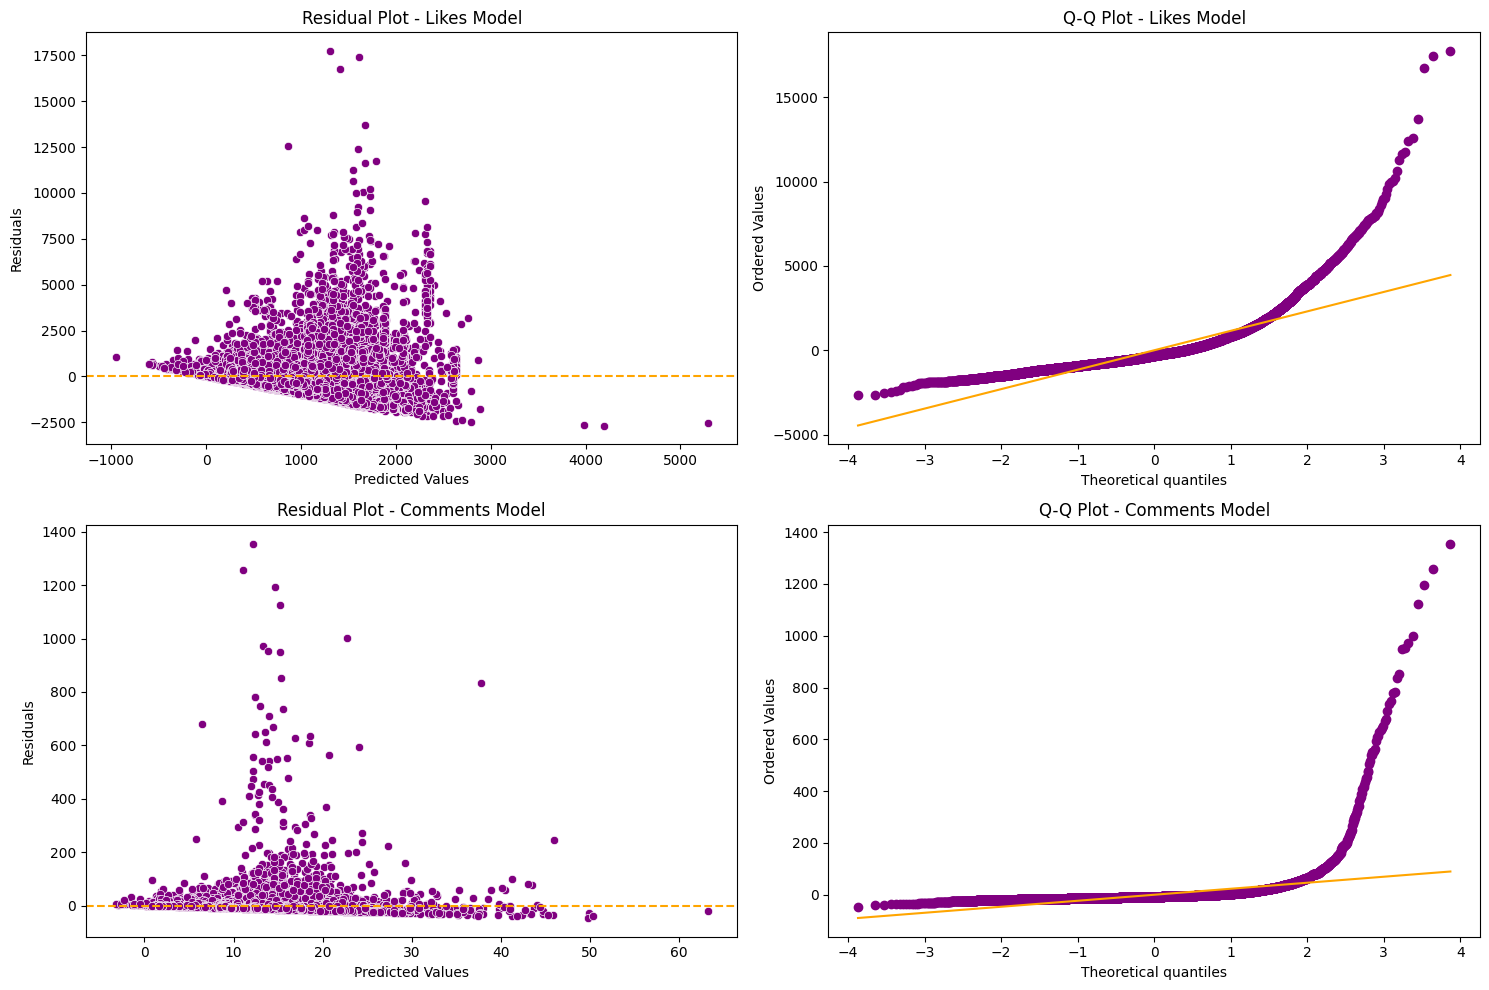

In [90]:
# Visualize residuals for both models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Likes model residual plot
sns.scatterplot(x=likes_predictions, y=likes_model.resid, color='purple', ax=axes[0,0])
axes[0,0].axhline(y=0, color='orange', linestyle='--')
axes[0,0].set_title('Residual Plot - Likes Model')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

# Likes model Q-Q plot
stats.probplot(likes_model.resid, dist="norm", plot=axes[0,1])
axes[0,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[0,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[0,1].get_lines()[1].set_color('orange')
axes[0,1].set_title('Q-Q Plot - Likes Model')

# Comments model residual plot
sns.scatterplot(x=comments_predictions, y=comments_model.resid, color='purple', ax=axes[1,0])
axes[1,0].axhline(y=0, color='orange', linestyle='--')
axes[1,0].set_title('Residual Plot - Comments Model')
axes[1,0].set_xlabel('Predicted Values')
axes[1,0].set_ylabel('Residuals')

# Comments model Q-Q plot
stats.probplot(comments_model.resid, dist="norm", plot=axes[1,1])
axes[1,1].get_lines()[0].set_markerfacecolor('purple')  # Changed to purple
axes[1,1].get_lines()[0].set_color('purple')  # Changed to purple
axes[1,1].get_lines()[1].set_color('orange')
axes[1,1].set_title('Q-Q Plot - Comments Model')

plt.tight_layout()
plt.show()

In [91]:
# Get feature names (excluding constant)
feature_names = IVs.columns

# Analyze likes model
likes_importance = analyze_coefficients(likes_model, feature_names, IVs, DV_likes)
print("\n=== Variable Importance for Likes Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(likes_importance)

# Analyze comments model
comments_importance = analyze_coefficients(comments_model, feature_names, IVs, DV_comments)
print("\n=== Variable Importance for Comments Model ===")
print("\nRanked by standardized coefficient magnitude (higher = more important):")
print(comments_importance)


=== Variable Importance for Likes Model ===

Ranked by standardized coefficient magnitude (higher = more important):
                                   Feature  Coefficient  Standardized_Beta  \
num_following                num_following  -260.080338          -0.184382   
num_followers                num_followers   226.042444           0.160251   
popular_tag_count        popular_tag_count   219.666963           0.155731   
count_of_exclamation  count_of_exclamation   164.003801           0.116269   
post_is_video                post_is_video  -451.086157          -0.092873   
length_of_post              length_of_post   -94.805246          -0.067211   
non_april_month            non_april_month  -252.644275          -0.046208   
num_users_in_photo      num_users_in_photo    54.874072           0.038903   
is_morning                      is_morning  -154.497140          -0.035969   
num_mentions                  num_mentions   -38.846332          -0.027540   
evening_or_night        

In [92]:
print("\n=== Temporal Effects Analysis ===")

# Weekend effect
weekend_effect_likes = likes_importance[likes_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on likes:")
print(weekend_effect_likes[['Feature', 'Coefficient', 'Significant']])

weekend_effect_comments = comments_importance[comments_importance['Feature'] == 'is_weekend']
print("\nWeekend vs Weekday effect on comments:")
print(weekend_effect_comments[['Feature', 'Coefficient', 'Significant']])

# Time of day effects
time_vars_likes = likes_importance[likes_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on likes:")
print(time_vars_likes[['Feature', 'Coefficient', 'Significant']])

time_vars_comments = comments_importance[comments_importance['Feature'].isin(['is_morning', 'evening_or_night'])]
print("\nTime of day effects on comments:")
print(time_vars_comments[['Feature', 'Coefficient', 'Significant']])

# Month effects
month_effect_likes = likes_importance[likes_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on likes:")
print(month_effect_likes[['Feature', 'Coefficient', 'Significant']])

month_effect_comments = comments_importance[comments_importance['Feature'] == 'non_april_month']
print("\nNon-April vs April effect on comments:")
print(month_effect_comments[['Feature', 'Coefficient', 'Significant']])


=== Temporal Effects Analysis ===

Weekend vs Weekday effect on likes:
               Feature  Coefficient  Significant
is_weekend  is_weekend   -23.530255        False

Weekend vs Weekday effect on comments:
               Feature  Coefficient  Significant
is_weekend  is_weekend     0.146601        False

Time of day effects on likes:
                           Feature  Coefficient  Significant
is_morning              is_morning  -154.497140         True
evening_or_night  evening_or_night   -28.970581        False

Time of day effects on comments:
                           Feature  Coefficient  Significant
evening_or_night  evening_or_night    -2.002099        False
is_morning              is_morning    -2.003213        False

Non-April vs April effect on likes:
                         Feature  Coefficient  Significant
non_april_month  non_april_month  -252.644275         True

Non-April vs April effect on comments:
                         Feature  Coefficient  Significant
non_apr

# **Additional Analyses for Infographic & Presentation**
We also made some nice visualizations that fit the color scheme, not a part of the original questions. NOTE: ChatGPT and Claude were used to tailor all the colors and fancy styles of these visualizations. While we already knew how to code the plots in a basic way, we needed additional help making them look extra nice for the infographic.

In [93]:
'''
These were the top 25 hashtags used for popular_tag_count from earlier:
#greece: 1346 times
#love: 1000 times
#fashion: 907 times
#karasevda: 810 times
#greek: 665 times
#photooftheday: 591 times
#style: 580 times
#beautiful: 555 times
#instagood: 458 times
#greekquote: 440 times
#anime: 422 times
#summer: 415 times
#burakozcivit: 393 times
#greekquotes: 391 times
#athens: 383 times
#happy: 366 times
#follow: 345 times
#picoftheday: 342 times
#skg: 337 times
#cute: 328 times
#greekpost: 323 times
#girl: 322 times
#spring: 321 times
#thessaloniki: 320 times
#ootd: 318 times
'''

'\nThese were the top 25 hashtags used for popular_tag_count from earlier:\n#greece: 1346 times\n#love: 1000 times\n#fashion: 907 times\n#karasevda: 810 times\n#greek: 665 times\n#photooftheday: 591 times\n#style: 580 times\n#beautiful: 555 times\n#instagood: 458 times\n#greekquote: 440 times\n#anime: 422 times\n#summer: 415 times\n#burakozcivit: 393 times\n#greekquotes: 391 times\n#athens: 383 times\n#happy: 366 times\n#follow: 345 times\n#picoftheday: 342 times\n#skg: 337 times\n#cute: 328 times\n#greekpost: 323 times\n#girl: 322 times\n#spring: 321 times\n#thessaloniki: 320 times\n#ootd: 318 times\n'

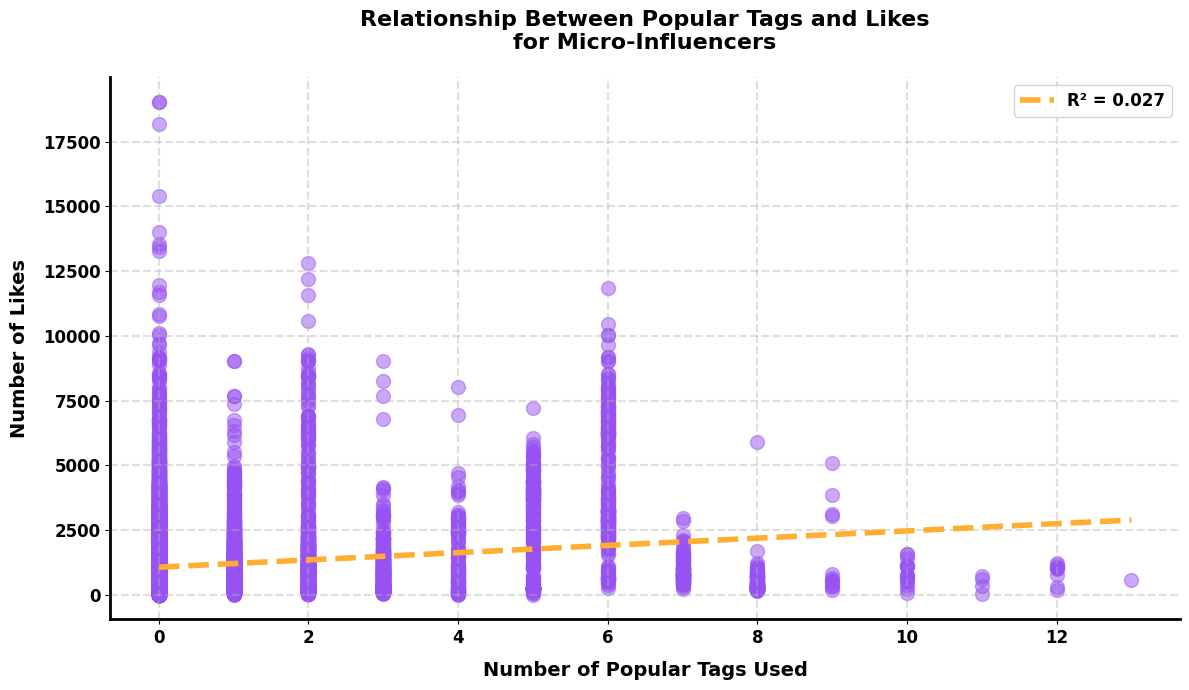

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Create the plot with Instagram colors
plt.figure(figsize=(12, 7))

# Instagram brand colors
main_color = '#9852f3'  # Instagram purple
secondary_color = '#ffae30'  # Instagram orange

# Create scatter plot with larger markers
plt.scatter(micro_influencers_q4['popular_tag_count'],
           micro_influencers_q4['num_likes'],
           alpha=0.5,
           color=main_color,
           s=100)  # Increased marker size

# Calculate and add line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(
    micro_influencers_q4['popular_tag_count'],
    micro_influencers_q4['num_likes']
)
line_x = np.array([
    micro_influencers_q4['popular_tag_count'].min(),
    micro_influencers_q4['popular_tag_count'].max()
])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color=secondary_color, linestyle='--',
         linewidth=4, label=f'R² = {r_value**2:.3f}')  # Increased line width

# Styling
plt.xlabel('Number of Popular Tags Used', fontsize=14, labelpad=10, weight='bold')  # Increased font weight
plt.ylabel('Number of Likes', fontsize=14, labelpad=10, weight='bold')  # Increased font weight
plt.title('Relationship Between Popular Tags and Likes\nfor Micro-Influencers',
         fontsize=16, pad=20, weight='bold')  # Increased font weight

# Add grid with custom style - thicker lines
plt.grid(True, linestyle='--', alpha=0.4, linewidth=1.5)  # Increased grid line width and opacity

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Make remaining spines thicker
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Add legend with larger font
plt.legend(prop={'size': 12, 'weight': 'bold'})

# Make tick labels thicker and larger
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Adjust layout
plt.tight_layout()

plt.show()

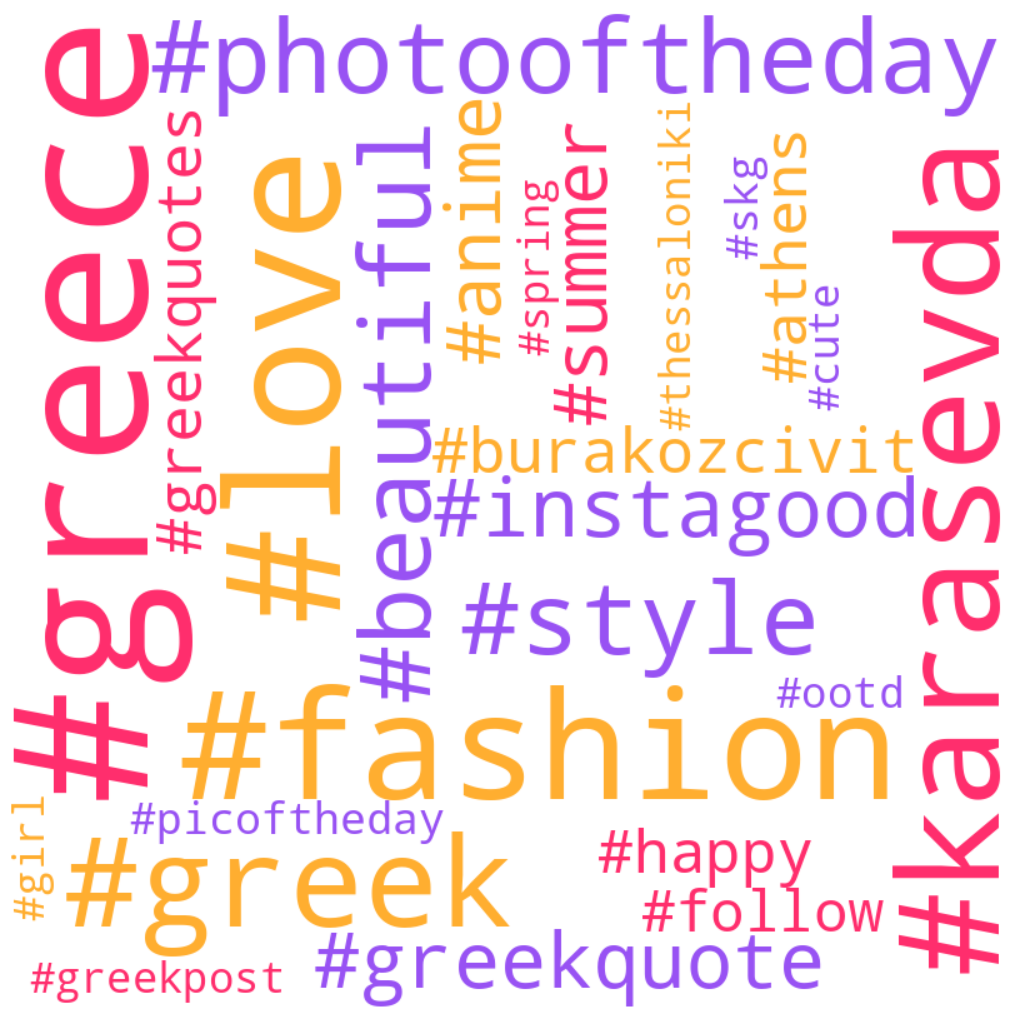

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Instagram-inspired colors
colors = ['#9852f3',  # purple
         '#ffae30',  # orange
         '#ff2e6d']  # pink

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return np.random.choice(colors)

# Sample hashtags with their frequencies
hashtag_counts = {
    '#greece': 1346,
    '#love': 1000,
    '#fashion': 907,
    '#karasevda': 810,
    '#greek': 665,
    '#photooftheday': 591,
    '#style': 580,
    '#beautiful': 555,
    '#instagood': 458,
    '#greekquote': 440,
    '#anime': 422,
    '#summer': 415,
    '#burakozcivit': 393,
    '#greekquotes': 391,
    '#athens': 383,
    '#happy': 366,
    '#follow': 345,
    '#picoftheday': 342,
    '#skg': 337,
    '#cute': 328,
    '#greekpost': 323,
    '#girl': 322,
    '#spring': 321,
    '#thessaloniki': 320,
    '#ootd': 318
}

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=800,
    height=800,  # Made square
    background_color='white',
    color_func=color_func,
    prefer_horizontal=0.3,  # Reduced horizontal preference to create more vertical words
    min_font_size=10,
    max_font_size=150,
    relative_scaling=0.6,  # Slightly increased for better size contrast
    random_state=42,  # For reproducibility
    max_words=len(hashtag_counts),
    include_numbers=True
).generate_from_frequencies(hashtag_counts)

# Display the word cloud
plt.figure(figsize=(10, 10))  # Square figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

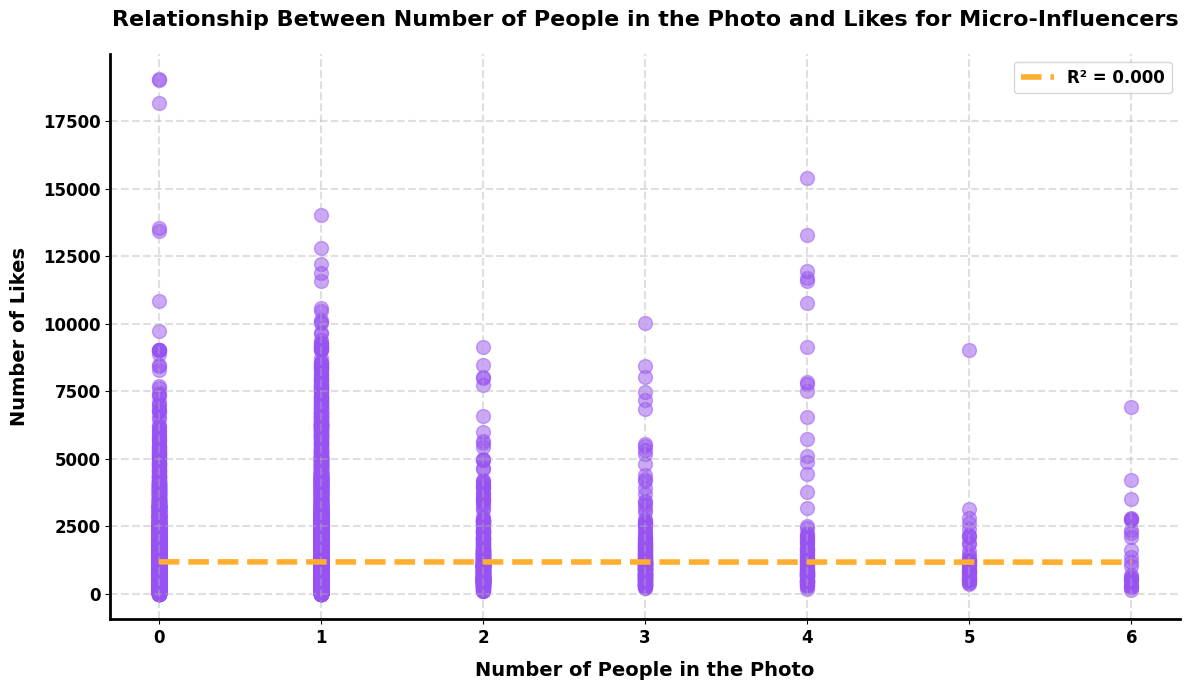

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = 'num_users_in_photo'
x_title = 'Number of People in the Photo'
title = 'Relationship Between Number of People in the Photo and Likes for Micro-Influencers'
y = 'num_likes'
y_title = 'Number of Likes'

# Create the plot with Instagram colors
plt.figure(figsize=(12, 7))

# Instagram brand colors
main_color = '#9852f3'  # Instagram purple
secondary_color = '#ffae30'  # Instagram orange

# Create scatter plot with larger markers
plt.scatter(micro_influencers_q4[x],
           micro_influencers_q4[y],
           alpha=0.5,
           color=main_color,
           s=100)  # Increased marker size

# Calculate and add line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(
    micro_influencers_q4[x],
    micro_influencers_q4[y]
)
line_x = np.array([
    micro_influencers_q4[x].min(),
    micro_influencers_q4[x].max()
])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color=secondary_color, linestyle='--',
         linewidth=4, label=f'R² = {r_value**2:.3f}')  # Increased line width

# Styling
plt.xlabel(x_title, fontsize=14, labelpad=10, weight='bold')  # Increased font weight
plt.ylabel(y_title, fontsize=14, labelpad=10, weight='bold')  # Increased font weight
plt.title(title,
         fontsize=16, pad=20, weight='bold')  # Increased font weight

# Add grid with custom style - thicker lines
plt.grid(True, linestyle='--', alpha=0.4, linewidth=1.5)  # Increased grid line width and opacity

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Make remaining spines thicker
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Add legend with larger font
plt.legend(prop={'size': 12, 'weight': 'bold'})

# Make tick labels thicker and larger
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Adjust layout
plt.tight_layout()

plt.show()

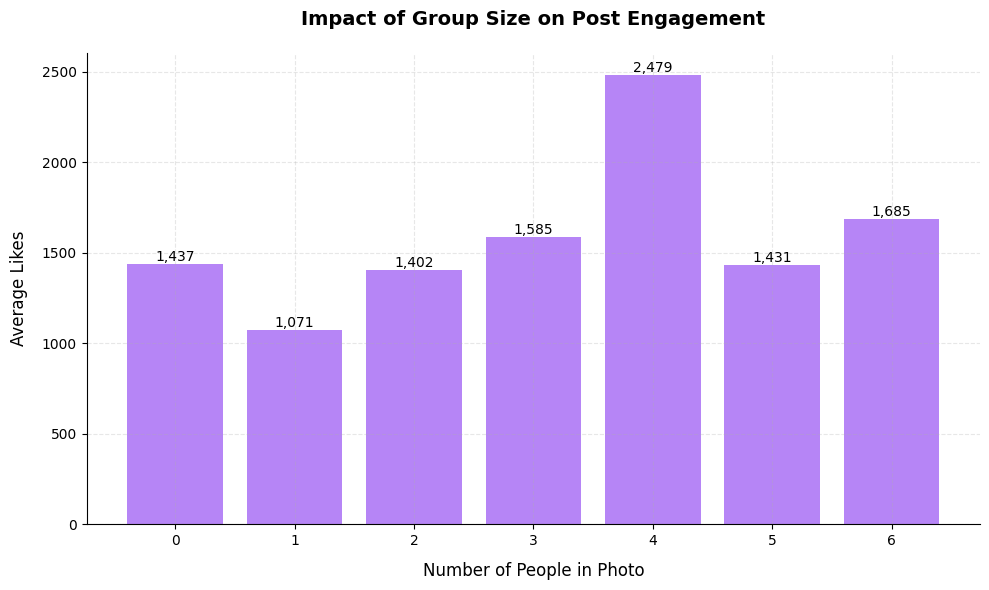

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean likes for each group size using actual data
mean_likes = micro_influencers_q4.groupby('num_users_in_photo')['num_likes'].mean()
group_sizes = mean_likes.index

# Create the visualization
plt.figure(figsize=(10, 6))

# Create bar plot with actual mean likes
bars = plt.bar(group_sizes, mean_likes.values,
              color='#9852f3',  # Instagram purple
              alpha=0.7)

# Customize the plot
plt.title('Impact of Group Size on Post Engagement',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of People in Photo', fontsize=12, labelpad=10)
plt.ylabel('Average Likes', fontsize=12, labelpad=10)

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure x-axis shows whole numbers
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()

<ipython-input-98-e91808c37e7d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_influencers_q4['caption_length_bin'] = pd.cut(micro_influencers_q4['length_of_post'],
<ipython-input-98-e91808c37e7d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_likes = micro_influencers_q4.groupby('caption_length_bin')['num_likes'].mean()


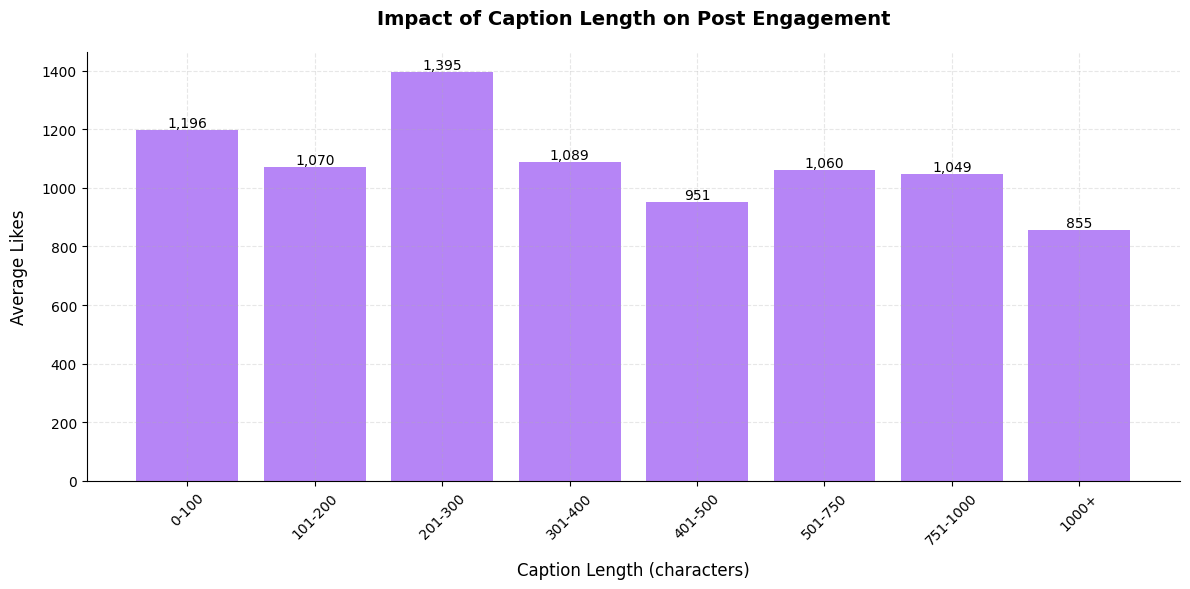

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create caption length bins
bins = [0, 100, 200, 300, 400, 500, 750, 1000, 2000]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-750', '751-1000', '1000+']

# Add bin column to data
micro_influencers_q4['caption_length_bin'] = pd.cut(micro_influencers_q4['length_of_post'],
                                                   bins=bins,
                                                   labels=labels,
                                                   include_lowest=True)

# Calculate mean likes for each bin
mean_likes = micro_influencers_q4.groupby('caption_length_bin')['num_likes'].mean()

# Create the visualization
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(mean_likes)), mean_likes.values,
              color='#9852f3',  # Instagram purple
              alpha=0.7)

# Customize the plot
plt.title('Impact of Caption Length on Post Engagement',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Caption Length (characters)', fontsize=12, labelpad=10)
plt.ylabel('Average Likes', fontsize=12, labelpad=10)

# Set x-axis labels
plt.xticks(range(len(labels)), labels, rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

plt.show()

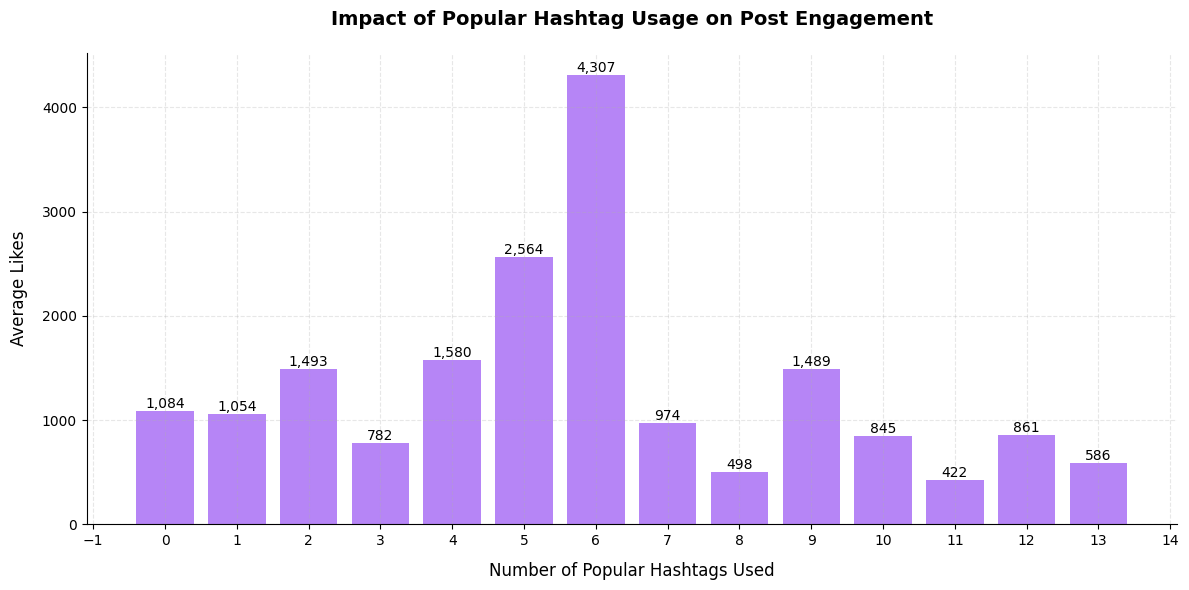

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean likes for each number of popular tags
mean_likes = micro_influencers_q4.groupby('popular_tag_count')['num_likes'].mean()
tag_counts = mean_likes.index

# Create the visualization
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(tag_counts, mean_likes.values,
              color='#9852f3',  # Instagram purple
              alpha=0.7)

# Customize the plot
plt.title('Impact of Popular Hashtag Usage on Post Engagement',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Popular Hashtags Used', fontsize=12, labelpad=10)
plt.ylabel('Average Likes', fontsize=12, labelpad=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure x-axis shows whole numbers
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Adjust layout
plt.tight_layout()

plt.show()

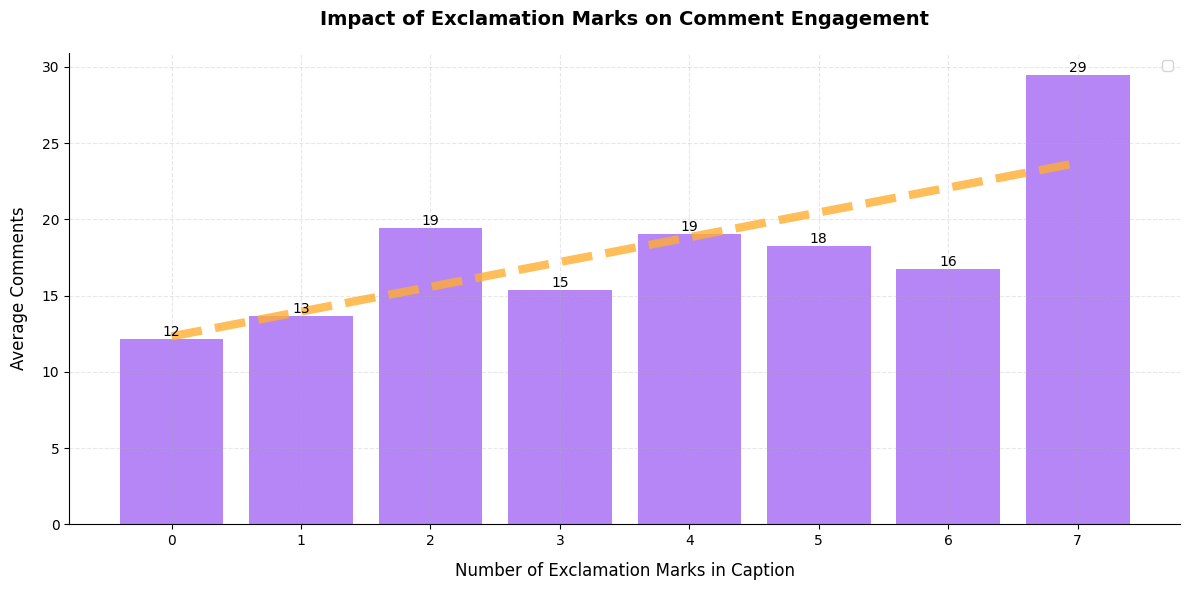

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean comments for each exclamation count
excl_limit = 7
filtered_data = micro_influencers_q4[micro_influencers_q4['count_of_exclamation'] <= excl_limit]
mean_comments = filtered_data.groupby('count_of_exclamation')['num_comments'].mean()
excl_counts = mean_comments.index

# Create the visualization
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(excl_counts, mean_comments.values,
              color='#9852f3',
              alpha=0.7)

# Add line of best fit
x = excl_counts
y = mean_comments.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='#ffae30', linestyle='--', alpha=0.8, linewidth=6)

# Customize the plot
plt.title('Impact of Exclamation Marks on Comment Engagement',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Exclamation Marks in Caption', fontsize=12, labelpad=10)
plt.ylabel('Average Comments', fontsize=12, labelpad=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure x-axis shows whole numbers
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

plt.show()

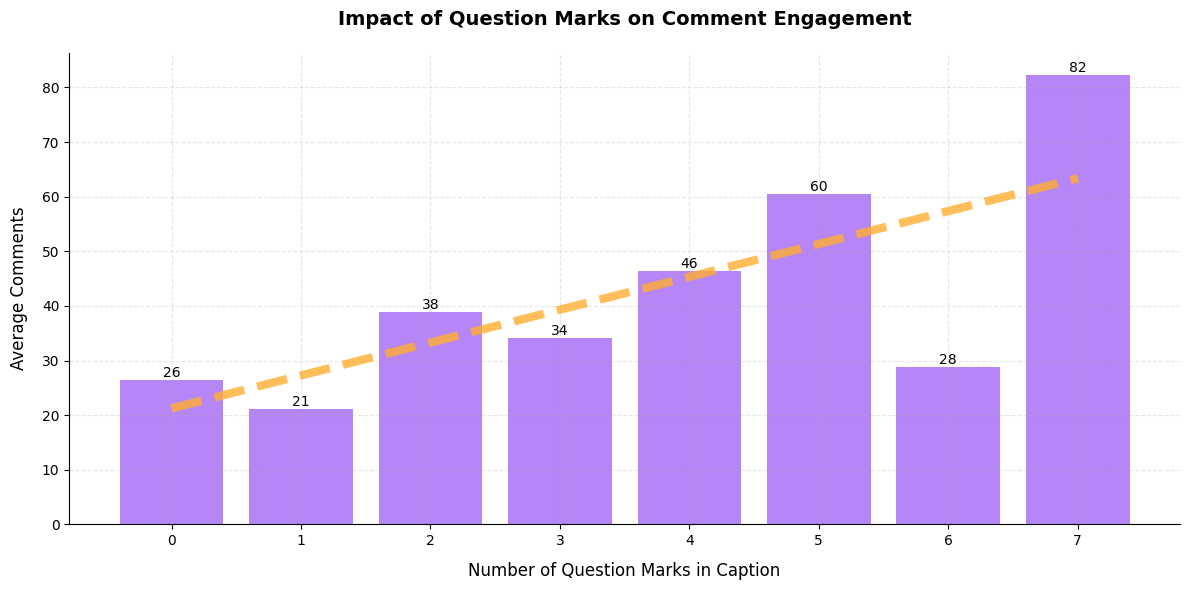

In [101]:
## THESE NEXT ONES ARE FOR THE MACRO INFLUENCERS


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean comments for each question mark count
q_limit = 7
filtered_data = macro_influencers_q4[macro_influencers_q4['count_of_question'] <= q_limit]
mean_comments = filtered_data.groupby('count_of_question')['num_comments'].mean()
q_counts = mean_comments.index

# Create the visualization
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(q_counts, mean_comments.values,
              color='#9852f3',
              alpha=0.7)

# Add line of best fit
x = q_counts
y = mean_comments.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='#ffae30', linestyle='--', alpha=0.8, linewidth=6)

# Customize the plot
plt.title('Impact of Question Marks on Comment Engagement',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Question Marks in Caption', fontsize=12, labelpad=10)
plt.ylabel('Average Comments', fontsize=12, labelpad=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure x-axis shows whole numbers
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Adjust layout
plt.tight_layout()

plt.show()

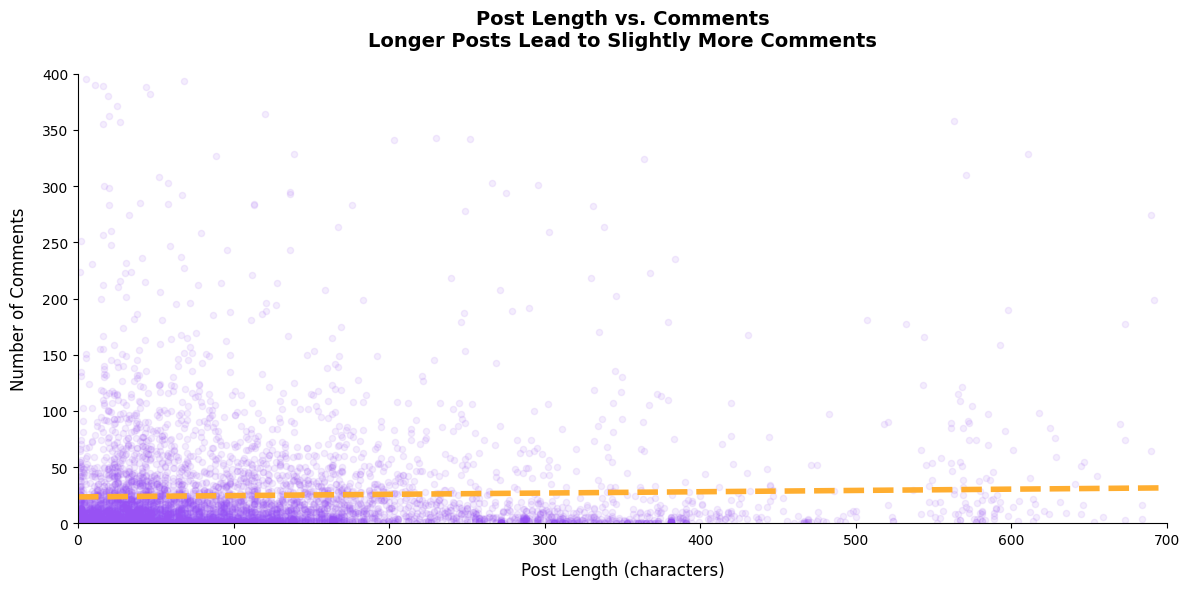

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a filtered dataset
post_length_limit = 700  # Limit x-axis to 500 characters
comment_limit = 400      # Limit y-axis to 200 comments
filtered_data = macro_influencers_q4[
    (macro_influencers_q4['length_of_post'] <= post_length_limit) &
    (macro_influencers_q4['num_comments'] <= comment_limit)
]

# Create the figure
plt.figure(figsize=(12, 6))

# Create scatter plot with alpha for transparency and smaller points
plt.scatter(filtered_data['length_of_post'],
           filtered_data['num_comments'],
           alpha=0.1,
           color='#9852f3',
           s=20)

# Add trend line for filtered data
z = np.polyfit(filtered_data['length_of_post'], filtered_data['num_comments'], 1)
p = np.poly1d(z)
x_trend = np.array([0, post_length_limit])
plt.plot(x_trend, p(x_trend), color='#ffae30', linestyle='--', linewidth=4)

# Customize the plot
plt.title('Post Length vs. Comments\nLonger Posts Lead to Slightly More Comments',
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Post Length (characters)', fontsize=12, labelpad=10)
plt.ylabel('Number of Comments', fontsize=12, labelpad=10)

# Set axis limits
plt.xlim(0, post_length_limit)
plt.ylim(0, comment_limit)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

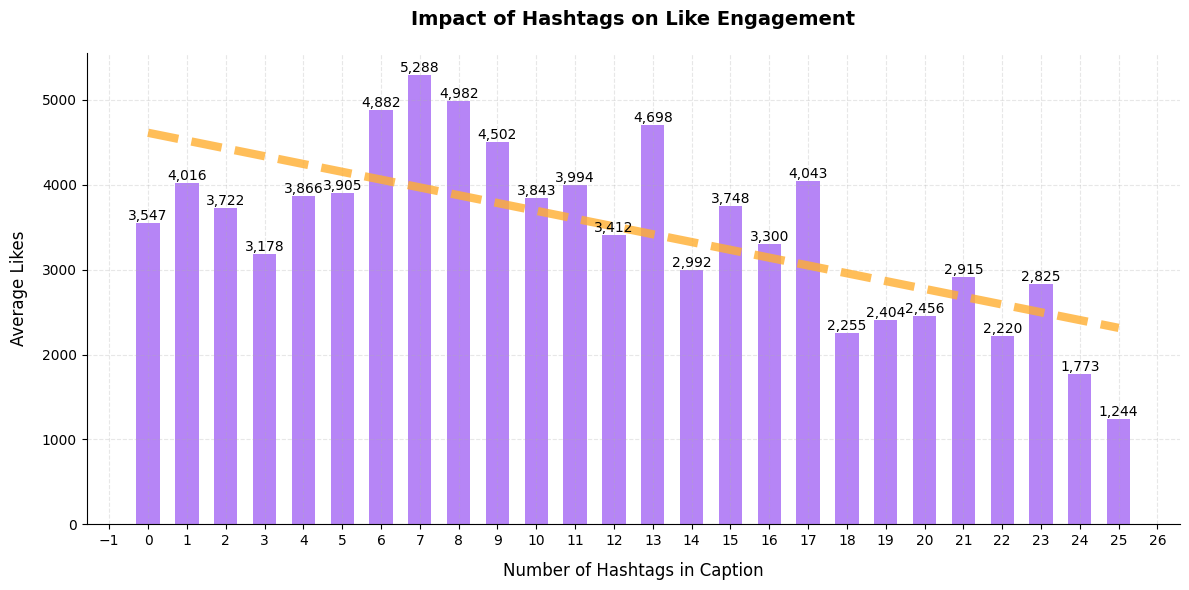

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate mean likes for each hashtag count
hash_limit = 25  # Limit to posts with 10 or fewer hashtags
filtered_data = macro_influencers_q4[macro_influencers_q4['num_hashtags'] <= hash_limit]
mean_likes = filtered_data.groupby('num_hashtags')['num_likes'].mean()
hash_counts = mean_likes.index

# Create the visualization
plt.figure(figsize=(12, 6))

# Create bar plot with width
bars = plt.bar(hash_counts, mean_likes.values,
             color='#9852f3',
             alpha=0.7,
             width=0.6)

# Add line of best fit
x = hash_counts
y = mean_likes.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='#ffae30', linestyle='--', alpha=0.8, linewidth=6)

# Customize the plot
plt.title('Impact of Hashtags on Like Engagement',
        fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Hashtags in Caption', fontsize=12, labelpad=10)
plt.ylabel('Average Likes', fontsize=12, labelpad=10)

# Add value labels on top of bars
for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom')

# Customize grid
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure x-axis shows whole numbers
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()